# Bike Sharing Dataset Analysis
## Exploratory Data Analysis and Predictive Modeling

### Time Series Assignment

**Submitted By:**  
Mohamed Fares Mekaoussi  
Email: mohamed-fares.mekaoussi@etu.u-paris.fr


---




### This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

### Installing packages

In [227]:
install.packages('tseries')
install.packages('forecast')
install.packages('corrplot')

Warning message:
"package 'tseries' is in use and will not be installed"
Warning message:
"package 'forecast' is in use and will not be installed"
Warning message:
"package 'corrplot' is in use and will not be installed"


### Importing libraries

In [228]:
library(tseries)
library(forecast)
library(corrplot)
library(dplyr)
library(ggplot2)
library(zoo)

### Reading the data

In [229]:
# read the data
day <- read.csv("day.csv")
hour <- read.csv("hour.csv")

# **Part 1: Data examination**



In [230]:
# Examining the data
str(day)
summary(day)
head(day)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "2011-01-01" "2011-01-02" "2011-01-03" "2011-01-04" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


    instant         dteday              season            yr        
 Min.   :  1.0   Length:731         Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   Mode  :character   Median :3.000   Median :1.0000  
 Mean   :366.0                      Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0                      Max.   :4.000   Max.   :1.0000  
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.000  
   weathersit         temp             atemp    

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [231]:
# Missing values
na_day <- is.na(day)
print(paste("The total number of missing data are:", sum(na_day)))

duplicate_rows <- duplicated(day)
print(paste("The total number of duplicated data are:", sum(duplicate_rows)))

[1] "The total number of missing data are: 0"
[1] "The total number of duplicated data are: 0"


* There are no missing values or duplicated values

## **1. How do the temperatures change across the seasons**

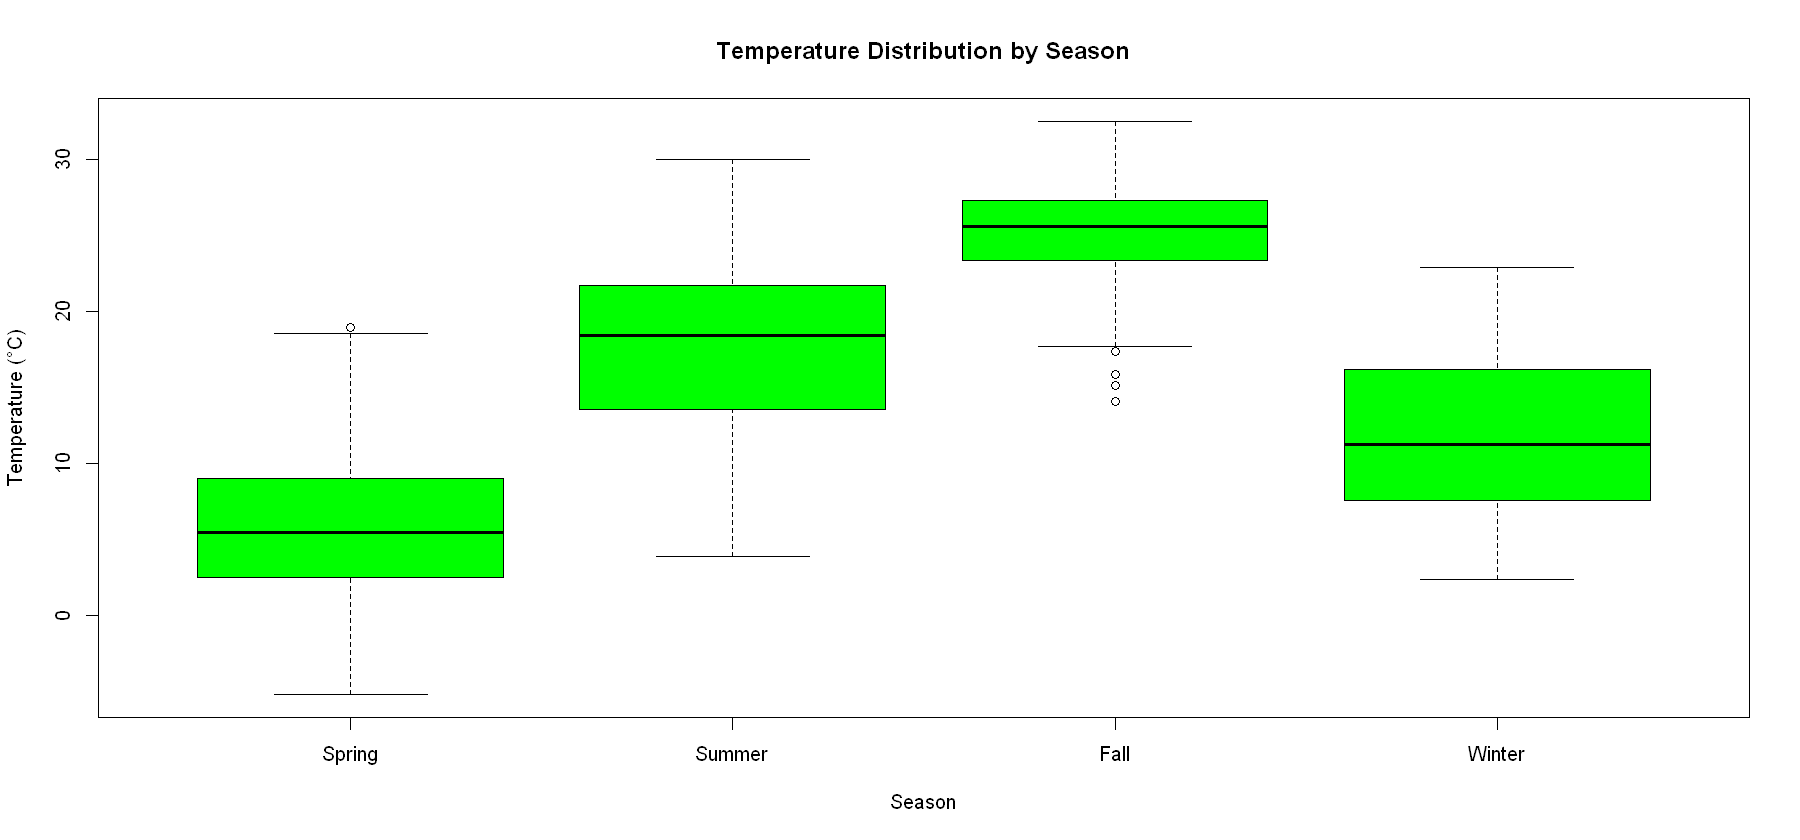

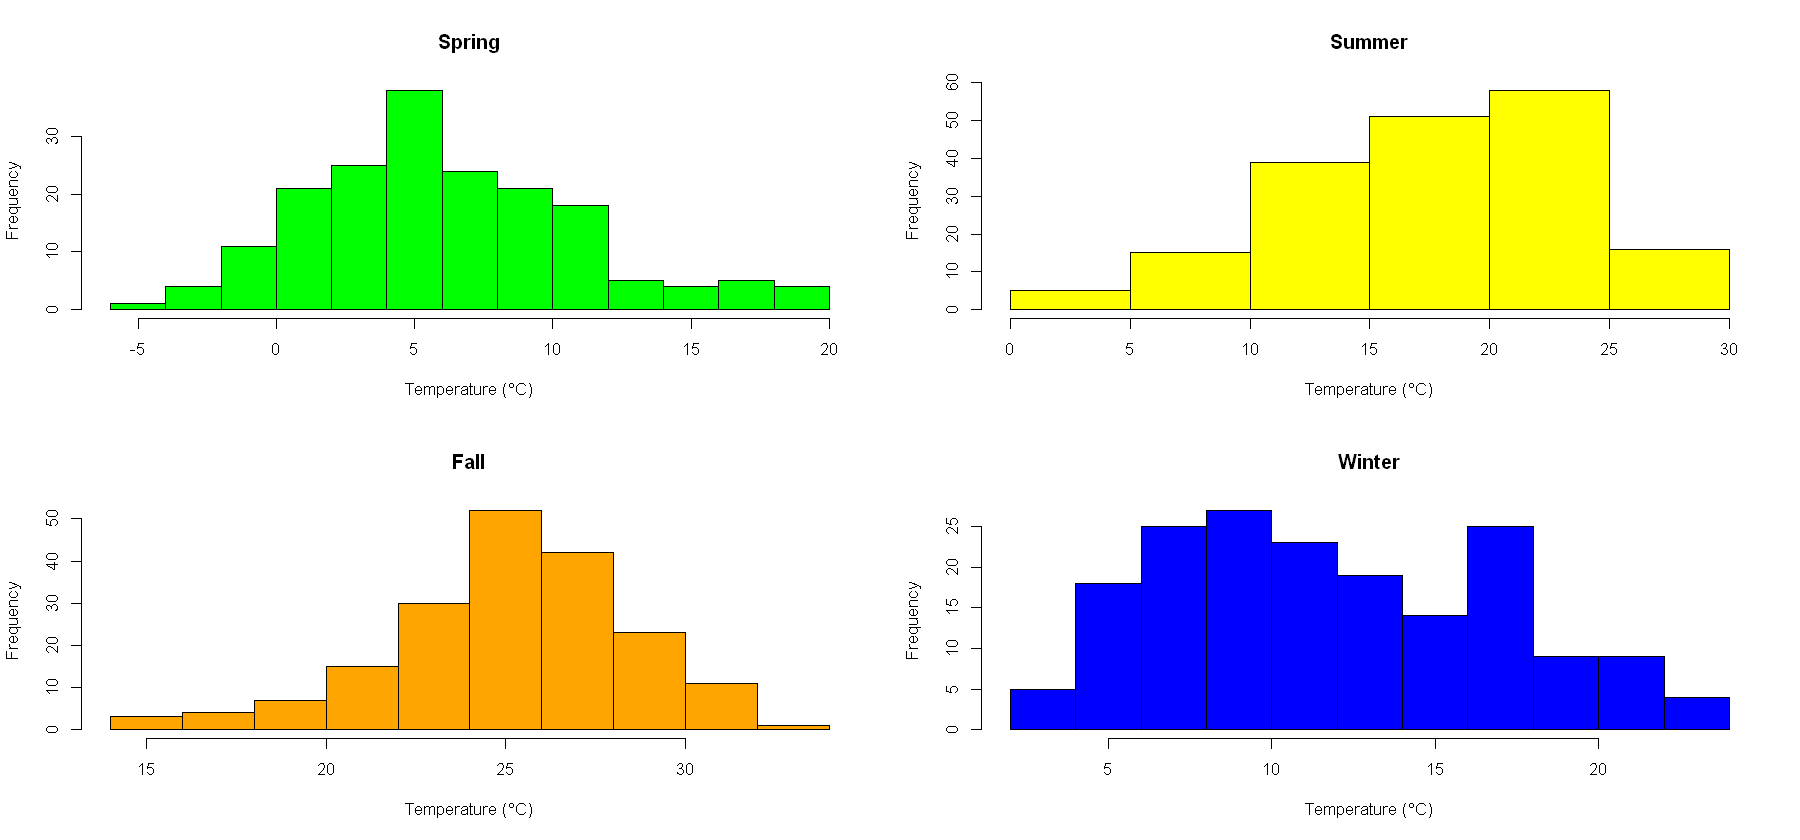

In [232]:
# Define the min and max temperature in Celsius
t_min <- -8
t_max <- 39

# Assuming 'day' is your data frame
data_celsius <- day

# Convert normalized temperature back to Celsius
data_celsius$temp_celsius <- data_celsius$temp * (t_max - t_min) + t_min

# Convert 'season' to factor for better plot labeling
season_labels <- c("Spring", "Summer", "Fall", "Winter")
data_celsius$season <- factor(data_celsius$season, levels = 1:4, labels = season_labels)

# Define colors for each season
season_colors <- c("Spring" = "green", "Summer" = "yellow", "Fall" = "orange", "Winter" = "blue")

options(repr.plot.width = 15)

# Create a boxplot for temperature distribution by season
boxplot(temp_celsius ~ season, data = data_celsius,
        main = "Temperature Distribution by Season",
        xlab = "Season",
        ylab = "Temperature (°C)",
        col = season_colors[data_celsius$season])

# Create a separate histogram for each season
par(mfrow = c(2, 2))  # This will create a 2x2 grid of plots

for (season in season_labels) {
  hist(data_celsius$temp_celsius[data_celsius$season == season],
       main = season,
       xlab = "Temperature (°C)",
       col = season_colors[season])
}

In [233]:
# Calculate the mean and median temperatures by season
data <- day
data$season <- factor(data$season, levels = c(1, 2, 3, 4), labels = c("spring", "summer", "fall", "winter"))
data %>%
  group_by(season) %>%
  summarise(mean_temp = mean(temp), median_temp = median(temp)) %>%
  mutate(mean_temp_celsius = mean_temp * (t_max - t_min) + t_min,
         median_temp_celsius = median_temp * (t_max - t_min) + t_min)

season,mean_temp,median_temp,mean_temp_celsius,median_temp_celsius
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
spring,0.2977475,0.2858330,5.994135,5.434151
summer,0.5444052,0.5620835,17.587042,18.417924
fall,0.7063093,0.7145830,25.196538,25.585401
winter,0.4229060,0.4091665,11.876584,11.230825


# Seasonal Temperature Analysis

## Temperature Changes Across Seasons

**1. Spring**
- Normalized temperatures: 0.2 - 0.5
- Corresponding Celsius range: 1.4°C - 15.5°C
- Mean temperature: **6°C**

**2. Summer**
- Normalized temperatures: 0.3 - 0.7
- Corresponding Celsius range: 6.1°C - 24.9°C
- Mean temperature: **17.6°C**

**3. Fall**
- Normalized temperatures: 0.5 - 0.85
- Corresponding Celsius range: 15.5°C - 31°C
- Mean temperature: **25°C**

**4. Winter**
- Normalized temperatures: 0.2 - 0.6
- Corresponding Celsius range: 1.4°C - 20°C
- Mean temperature: **11.9°C**

## Mean and Median Temperatures

- Mean of all observations: 0.49538 (Normalized) -> **15.3°C**
- Median of all observations: 0.49833 (Normalized) -> **15.4°C**


## **2.  correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals**

[1] "Correlation between temp and cnt:  0.627494009033492"
[1] "Correlation between atemp and cnt:  0.631065699849181"
[1] "Correlation between mean temp/atemp and cnt:  0.630481111005741"


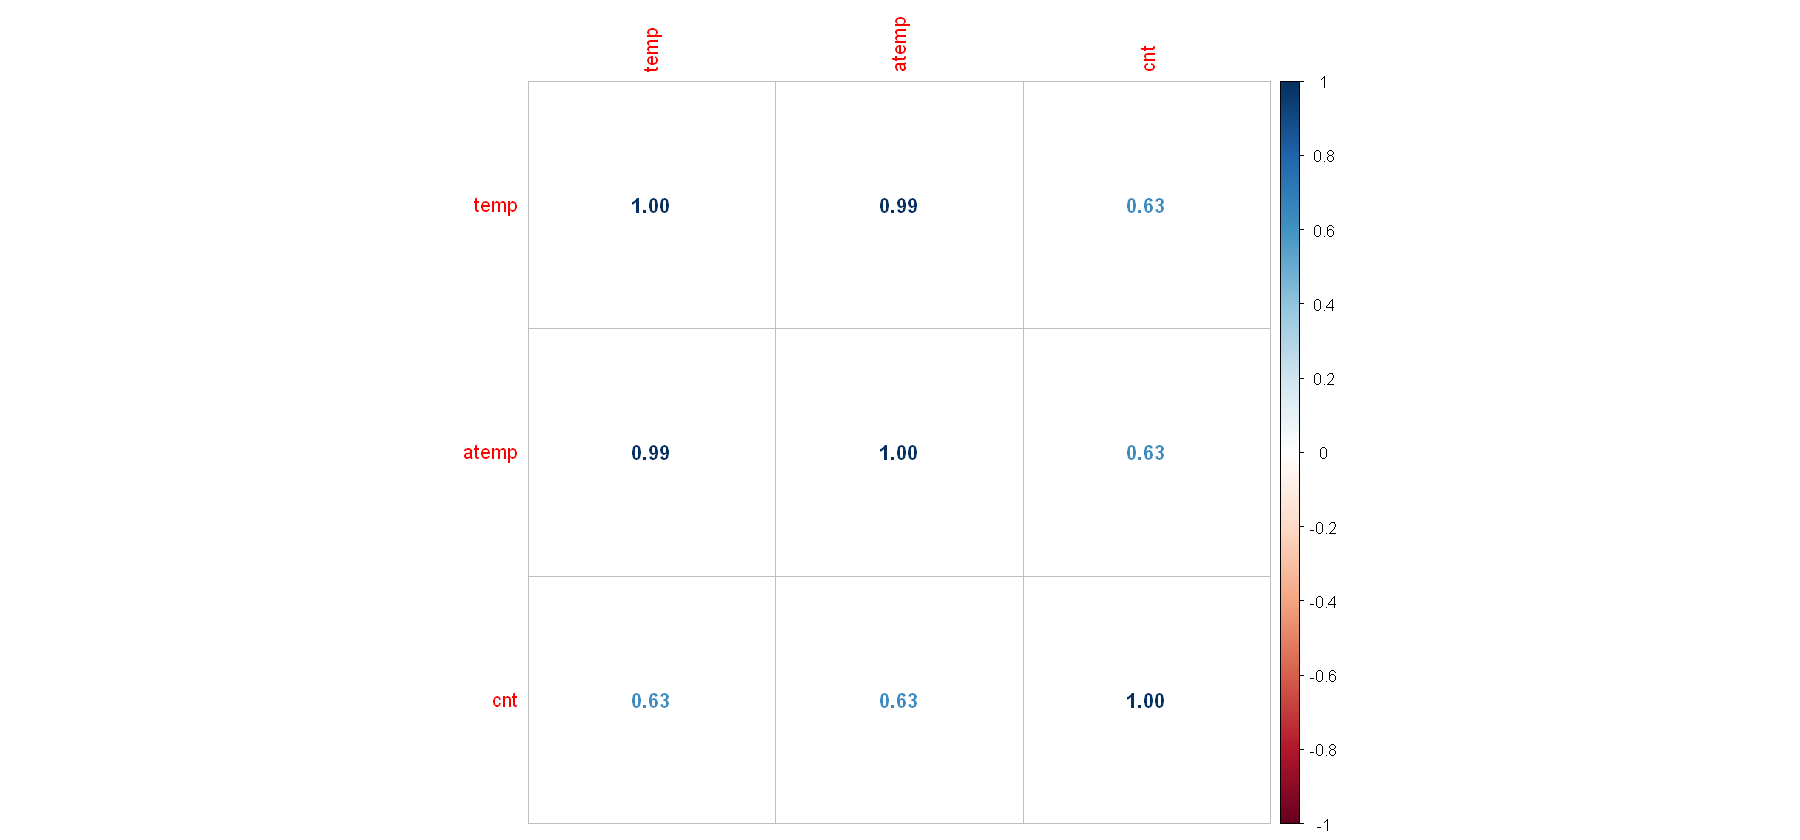

In [234]:
# calculate the correlation matrix
# Calculate the correlation matrix
cor_matrix <- cor(day[,c("temp", "atemp", "cnt")], use = "complete.obs")

# Plot the correlation matrix
corrplot(cor_matrix, method = "number")

# Create a new variable for the mean of temp and atemp
data$mean_temp_atemp <- (day$temp + day$atemp) / 2
# Calculate the correlation coefficients of temp, atemp, and mean.temp.atemp with cnt
# Calculate the correlation
cor_temp_cnt <- cor(data$temp, data$cnt, use = "complete.obs")
cor_atemp_cnt <- cor(data$atemp, data$cnt, use = "complete.obs")
cor_mean_temp_atemp_cnt <- cor(data$mean_temp_atemp, data$cnt, use = "complete.obs")

# Print the correlation
print(paste("Correlation between temp and cnt: ", cor_temp_cnt))
print(paste("Correlation between atemp and cnt: ", cor_atemp_cnt))
print(paste("Correlation between mean temp/atemp and cnt: ", cor_mean_temp_atemp_cnt))

# Correlation Analysis of Bike Rentals

## Temperature vs Bike Rentals

The correlation between the actual temperature (`temp`) and the total count of bike rentals (`cnt`) is approximately **0.63**. This suggests a **positive relationship**, implying that as the temperature increases, the total count of bike rentals tends to increase as well.

## Feeling Temperature vs Bike Rentals

Similarly, the correlation between the feeling temperature (`atemp`) and `cnt` is also approximately **0.63**, indicating a similar **strong positive relationship**.

## Average Temperature vs Bike Rentals

Interestingly, the correlation between the mean of `temp` and `atemp` and `cnt` is approximately **0.63** as well, suggesting that the average temperature (whether actual or feeling) has a positive relationship with the total count of bike rentals.

## Conclusion

These results suggest that **warmer temperatures are associated with higher bike rental counts**. This insight could be particularly useful for predicting bike rental demand based on weather forecasts.


# **3. the mean temperature, humidity, windspeed and total rentals per months**

mnth,temp,hum,windspeed,cnt
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2364439,0.5858283,0.2063028,2176.339
2,0.2992264,0.5674647,0.2156839,2655.298
3,0.3905388,0.5884750,0.2226994,3692.258
4,0.4699988,0.5880631,0.2344822,4484.900
5,0.5947984,0.6889583,0.1829889,5349.774
6,0.6840972,0.5758055,0.1854199,5772.367
7,0.7554704,0.5978763,0.1660588,5563.677
8,0.7085816,0.6377301,0.1729181,5664.419
9,0.6164850,0.7147144,0.1659451,5766.517


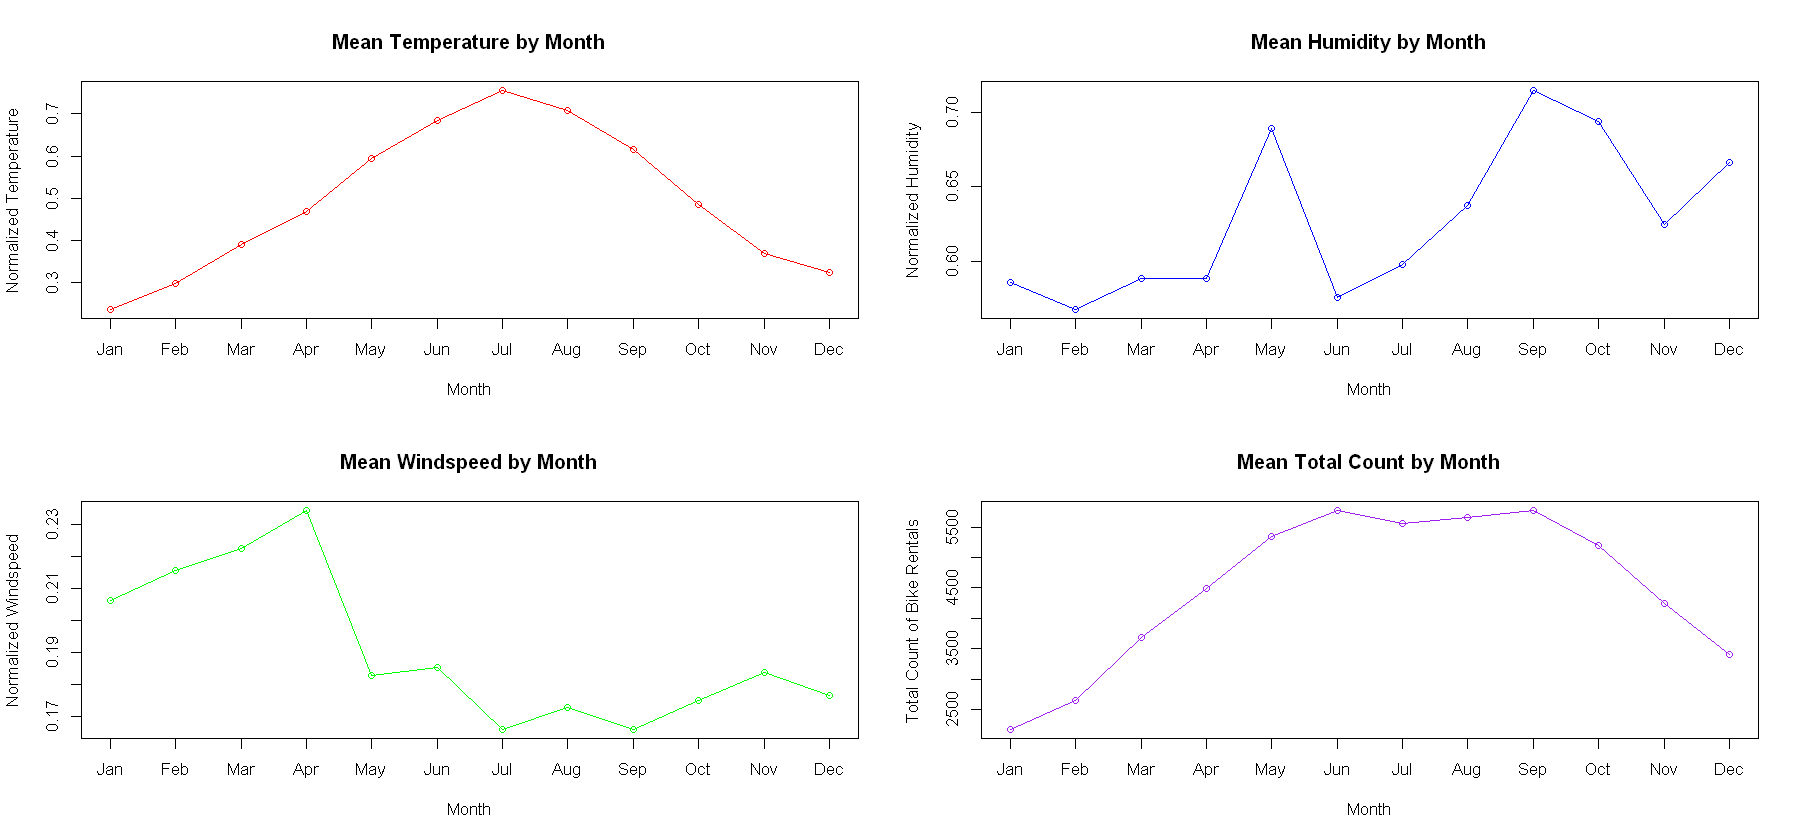

In [235]:
aggregate(cbind(temp, hum, windspeed, cnt) ~ mnth, data = day, mean)

# Set up a 2x2 plotting device
par(mfrow = c(2, 2))

# Use barplots to compare the mean values of the variables across months
# Use line plots to compare the mean values of the variables across months
plot(aggregate(temp ~ mnth, data = data, mean)$temp, type = "o", main = "Mean Temperature by Month", xlab = "Month", ylab = "Normalized Temperature", xaxt = "n", col = "red")
axis(1, at=1:12, labels=month.abb)
plot(aggregate(hum ~ mnth, data = data, mean)$hum, type = "o", main = "Mean Humidity by Month", xlab = "Month", ylab = "Normalized Humidity", xaxt = "n", col = "blue")
axis(1, at=1:12, labels=month.abb)
plot(aggregate(windspeed ~ mnth, data = data, mean)$windspeed, type = "o", main = "Mean Windspeed by Month", xlab = "Month", ylab = "Normalized Windspeed", xaxt = "n", col = "green")
axis(1, at=1:12, labels=month.abb)
plot(aggregate(cnt ~ mnth, data = data, mean)$cnt, type = "o", main = "Mean Total Count by Month", xlab = "Month", ylab = "Total Count of Bike Rentals", xaxt = "n", col = "purple")
axis(1, at=1:12, labels=month.abb)
# Reset to default plotting device
par(mfrow = c(1, 1))


# **4. Is temperature associated with bike rentals (registered vs. casual)?**

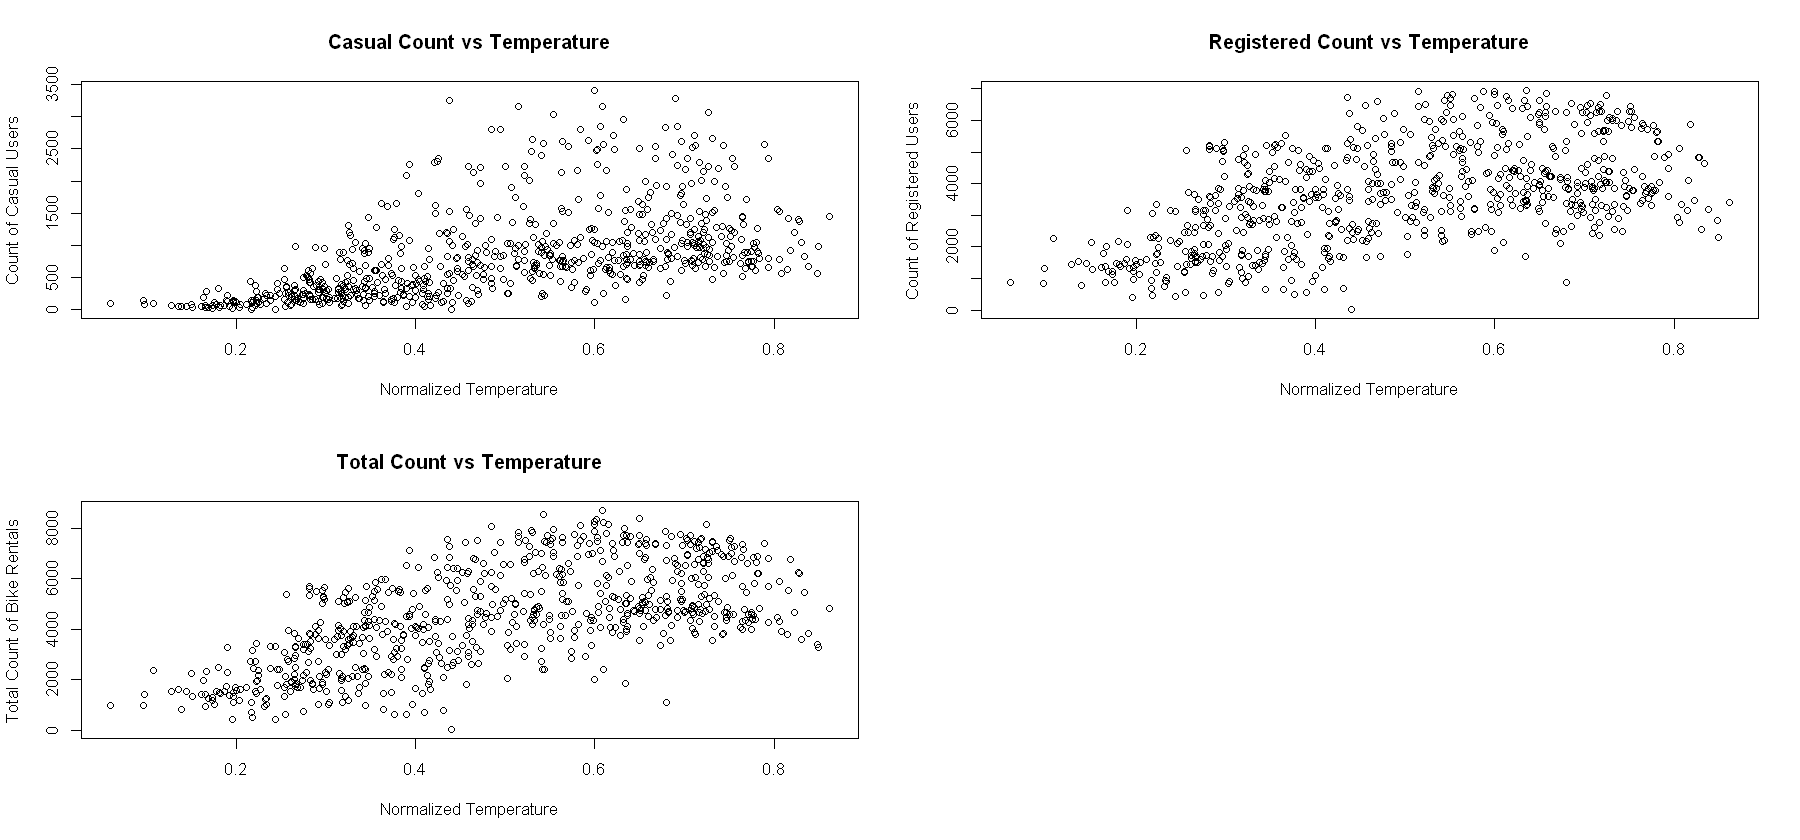

In [236]:
# Is temperature associated with bike rentals (registered vs. casual)?
par(mfrow = c(2, 2))
# Use scatterplots to visualize the relationship between temp and casual, registered, and cnt
plot(casual ~ temp, data = data, main = "Casual Count vs Temperature", xlab = "Normalized Temperature", ylab = "Count of Casual Users")
plot(registered ~ temp, data = data, main = "Registered Count vs Temperature", xlab = "Normalized Temperature", ylab = "Count of Registered Users")
plot(cnt ~ temp, data = data, main = "Total Count vs Temperature", xlab = "Normalized Temperature", ylab = "Total Count of Bike Rentals")
par(mfrow = c(1, 1))

In [237]:

correlation_temp_casual <- cor(day[c("temp", "casual")])
correlation_temp_registered <- cor(day[c("temp", "registered")])
correlation_temp_ctr <- cor(day[c("temp", "cnt")])

print("Correlation between temperature and casual rentals:")
print(correlation_temp_casual)

print("Correlation between temperature and registered rentals:")
print(correlation_temp_registered)

print("Correlation between temperature and total rentals:")
print(correlation_temp_ctr)

[1] "Correlation between temperature and casual rentals:"
            temp    casual
temp   1.0000000 0.5432847
casual 0.5432847 1.0000000
[1] "Correlation between temperature and registered rentals:"
               temp registered
temp       1.000000   0.540012
registered 0.540012   1.000000
[1] "Correlation between temperature and total rentals:"
         temp      cnt
temp 1.000000 0.627494
cnt  0.627494 1.000000


# Correlation Analysis of Bike Rentals

## Temperature vs Bike Rentals

There is a **positive correlation** between temperature and bike rentals for both registered and casual users, as well as the total count of bike rentals. The scatter plots indicate that as temperature increases, the number of bike rentals also tends to increase.

The correlation coefficients are as follows:

| Rental Type | Correlation Coefficient |
|-------------|------------------------|
| Casual      | 0.5432847              |
| Registered  | 0.540012               |
| Total       | 0.627494               |

These values suggest that temperature has a moderate positive correlation with bike rentals for both casual and registered users, and a slightly stronger positive correlation with the total count of bike rentals. This means that higher temperatures are associated with higher bike rentals, and lower temperatures are associated with lower bike rentals.



# **Time series analysis**

## **5. Ploting the cnt vs dteday and examining its patterns and irregularities**

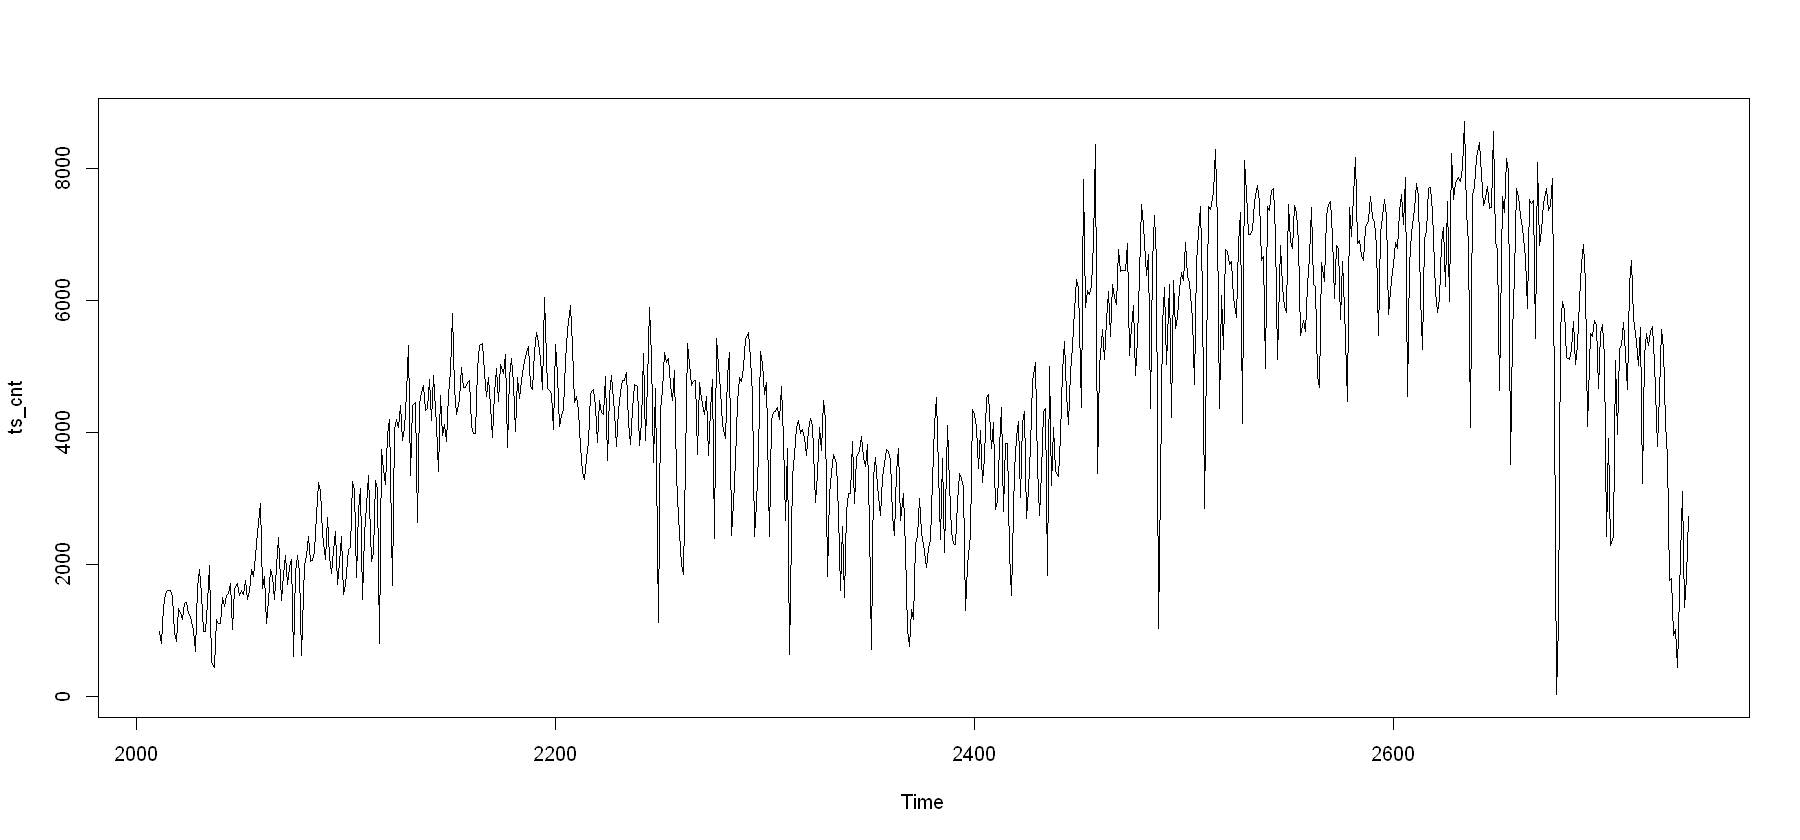

In [238]:
data <- day
data$dtdays <- as.Date(data$dteday, format = "%Y-%m-%d")
ts_cnt <- ts(data$cnt, start = c(2011, 1, 1))
plot(ts_cnt)

# Analysis of Bike Rentals Over Time

Based on the provided plot, the count of bike rentals (`cnt`) exhibits certain patterns and irregularities over time (`dteday`):

## Observations

1. **Seasonality**: The `cnt` shows a cyclical pattern, suggesting a strong seasonality in bike rentals.

2. **Trend**: There appears to be an overall increasing trend in the `cnt` over time.

3. **Irregularities**: There are noticeable fluctuations in `cnt` over time, with some peaks and troughs.

## **6. checking for outliers**

In [239]:
# outlier detection and removal
# Calculate the mean and standard deviation of the count of bike rentals
mean_cnt <- mean(data$cnt)
sd_cnt <- sd(data$cnt)

# Calculate the lower and upper bounds for outlier detection
lower_bound <- mean_cnt - 3 * sd_cnt
upper_bound <- mean_cnt + 3 * sd_cnt

# Detect the outliers
outliers <- data$cnt < lower_bound | data$cnt > upper_bound

# Print the outliers
print(data[outliers, ])

# Remove the outliers
data <- data[!outliers, ]

# Create a time series object for the count of bike rentals
ts_cnt <- ts(data$cnt, start = c(2011, 1, 1), frequency = 365)

 [1] instant    dteday     season     yr         mnth       holiday   
 [7] weekday    workingday weathersit temp       atemp      hum       
[13] windspeed  casual     registered cnt        dtdays    
<0 rows> (or 0-length row.names)


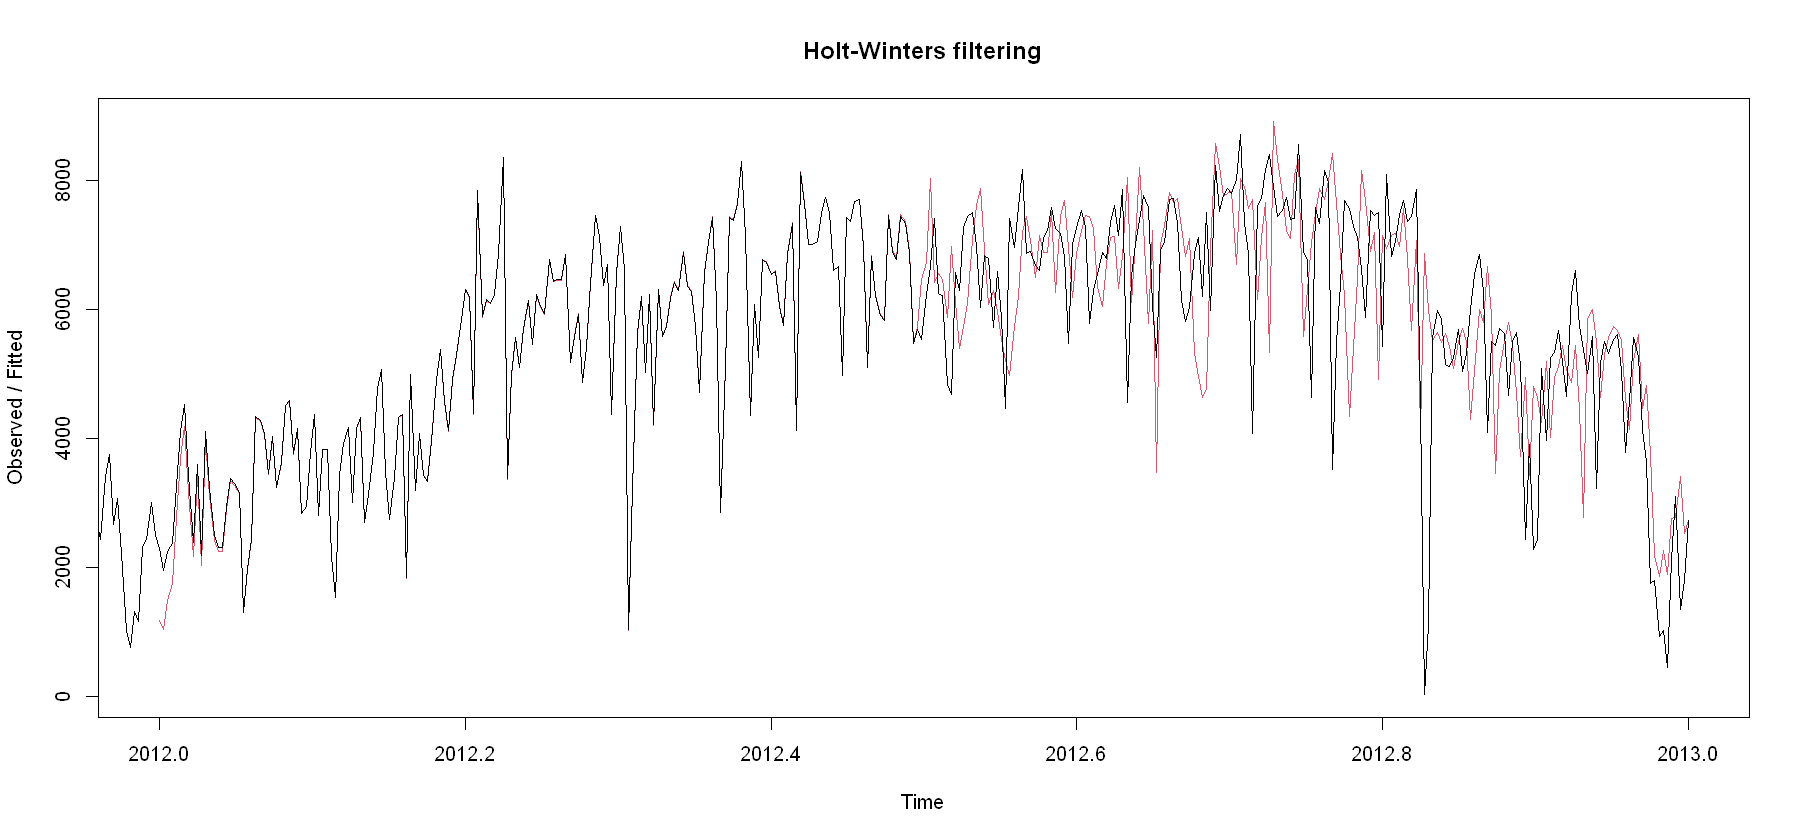

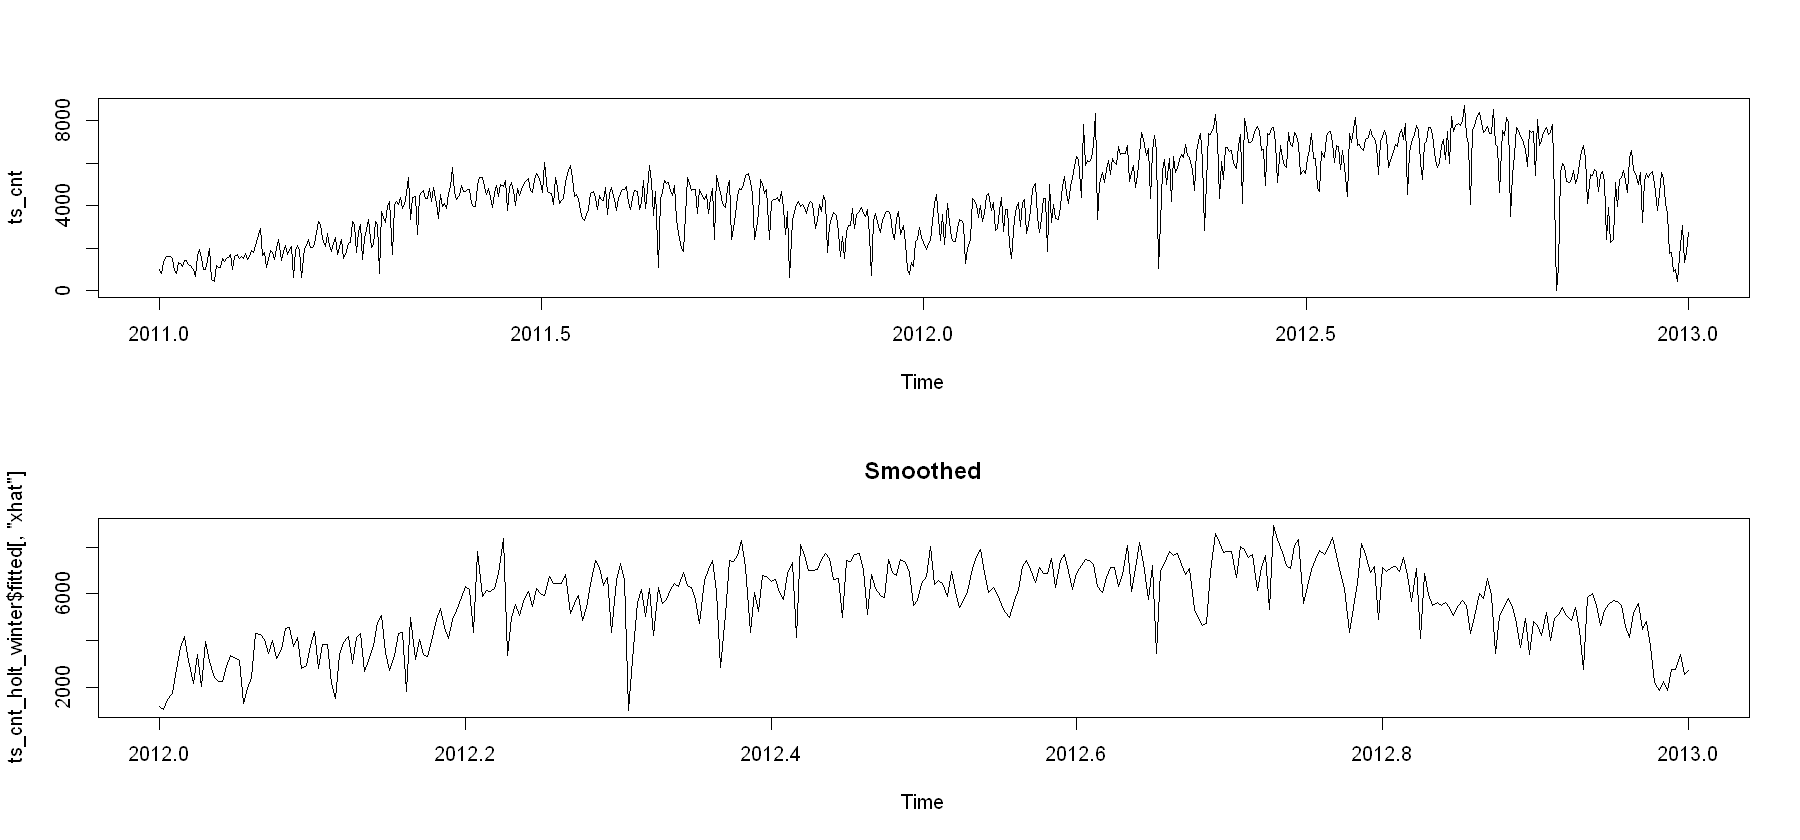

In [240]:
# Holt-Winters exponential smoothing
ts_cnt_holt_winter <- HoltWinters(ts_cnt)
# Plot the time series and the fitted model
plot(ts_cnt_holt_winter)
# Compare with the original
par(mfrow = c(2, 1))
plot(ts_cnt)
plot(ts_cnt_holt_winter$fitted[, "xhat"], main = "Smoothed")


# Choice of Smoothing Method for Bike Rentals Forecasting

Based on the observed characteristics of the bike rentals data (`cnt`), the most suitable smoothing method would be **Holt-Winters' Exponential Smoothing**.

## Justification

1. **Seasonality**: The `cnt` shows a cyclical pattern, suggesting a strong seasonality in bike rentals. Holt-Winters' method is capable of modeling this seasonality.

2. **Trend**: There appears to be an overall increasing trend in the `cnt` over time. Holt-Winters' method can also capture this trend.

3. **Irregularities**: There are noticeable fluctuations in `cnt` over time, Holt-Winters' method can still provide a reasonable forecast by capturing the overall pattern.

# **Part 2:**
## Frequency of bike rentals by day of the week

Warning message in HoltWinters(ts_cnt):
"optimization difficulties: ERROR: ABNORMAL_TERMINATION_IN_LNSRCH"


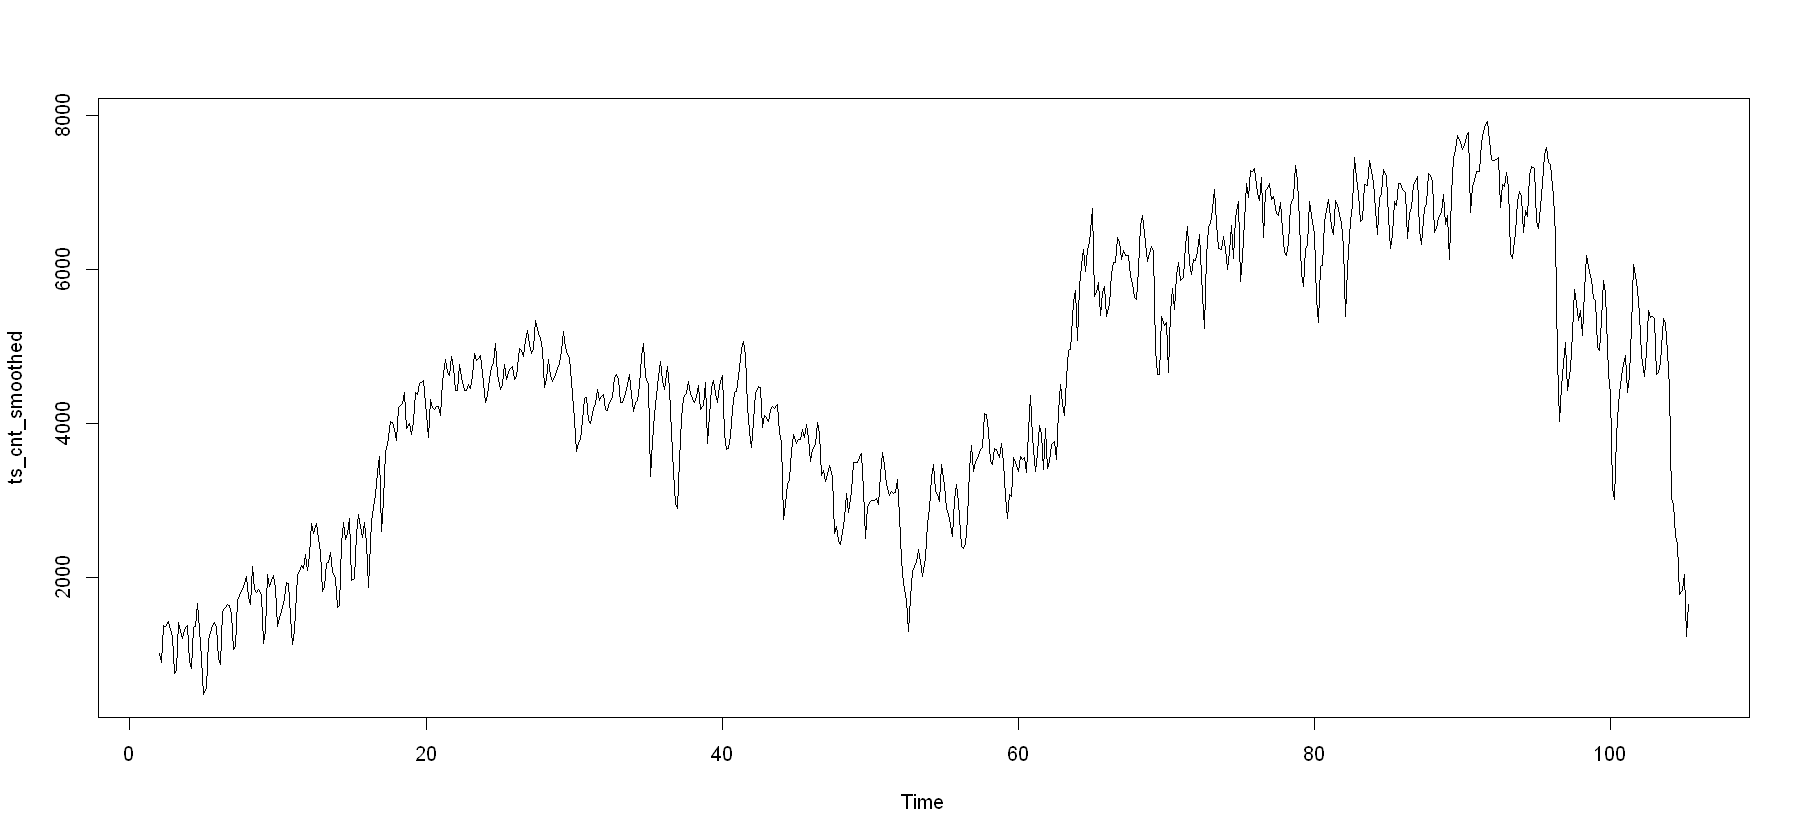

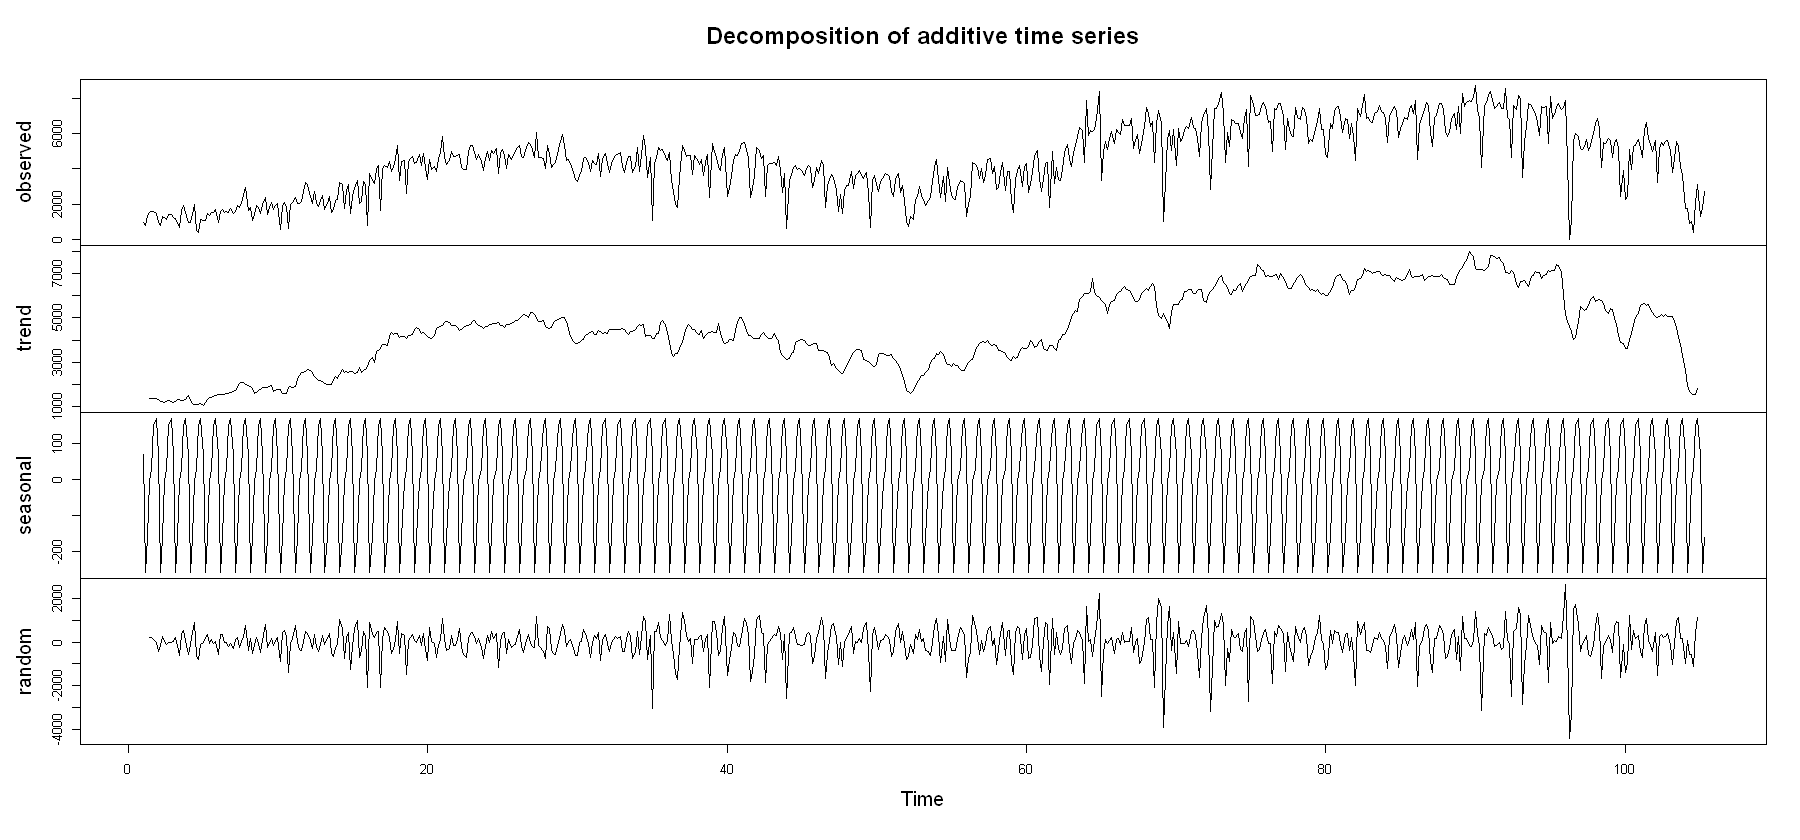

In [241]:
## Time series analysis
ts_cnt <-msts(data[,'cnt'], seasonal.periods=c(7))
# Fit an Holt-Winters exponential smoothing model
ts_cnt_holt_winter <- HoltWinters(ts_cnt)
ts_cnt_smoothed <- ts_cnt_holt_winter$fitted[, "xhat"]
# Plot the time series and the fitted model
plot(ts_cnt_smoothed)

# Decompose the time series
ts_cnt_decomp <- decompose(ts_cnt)

# Plot the decomposed time series
plot(ts_cnt_decomp)


# Frequency Selection for Time Series Smoothing

The frequency for the smoothed time series has been set to **7**.

## Justification

The choice of this frequency is based on the following observations from the plot:

1. **Weekly Patterns**: The bike rentals data (`cnt`) shows patterns that repeat every seven units of time. This suggests a weekly cycle.

2. **Seasonality**: The decomposition plot shows a clear seasonal component with a period of 7. This further supports the choice of a weekly frequency.

## **Checking for stationarity**

In [242]:
## Test for Stationarity
adf_test <- adf.test(ts_cnt_smoothed, alternative='stationary')
print(adf_test)



	Augmented Dickey-Fuller Test

data:  ts_cnt_smoothed
Dickey-Fuller = -1.084, Lag order = 8, p-value = 0.9252
alternative hypothesis: stationary



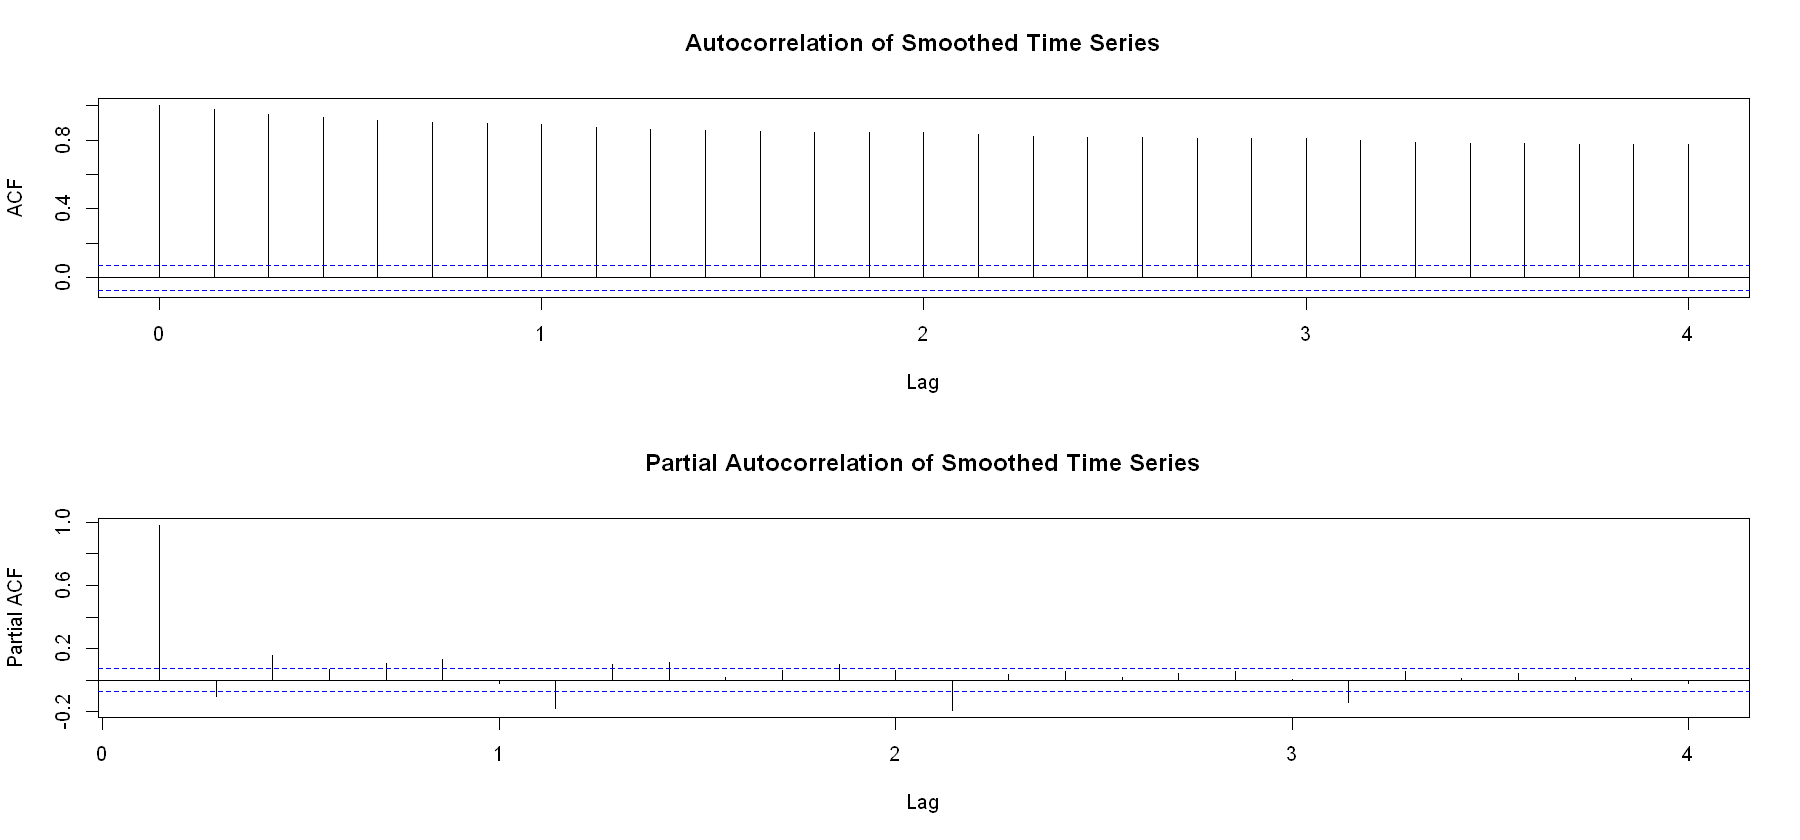

In [243]:

# Check for stationarity
par(mfrow = c(2, 1))
acf(ts_cnt_smoothed, main = "Autocorrelation of Smoothed Time Series")
pacf(ts_cnt_smoothed, main = "Partial Autocorrelation of Smoothed Time Series")

# Analysis of Stationarity and Seasonality in Bike Rentals Time Series

## **Stationarity**

The Augmented Dickey-Fuller Test was performed on the smoothed time series data (`ts_cnt_smoothed`). The test statistic is -1.084 and the p-value is 0.9252.

Given the high p-value, we fail to reject the null hypothesis of the Augmented Dickey-Fuller Test, which suggests that the time series is non-stationary.

## **Conclusion**

In conclusion, the bike rentals time series appears to be non-stationary with a seasonal component. This implies that the number of bike rentals varies over time with a repeating pattern.


# **Part 3**
## **Using ARIMA to model the smothed sime series**

## **Diffrerence (making the Time serie stationary)**

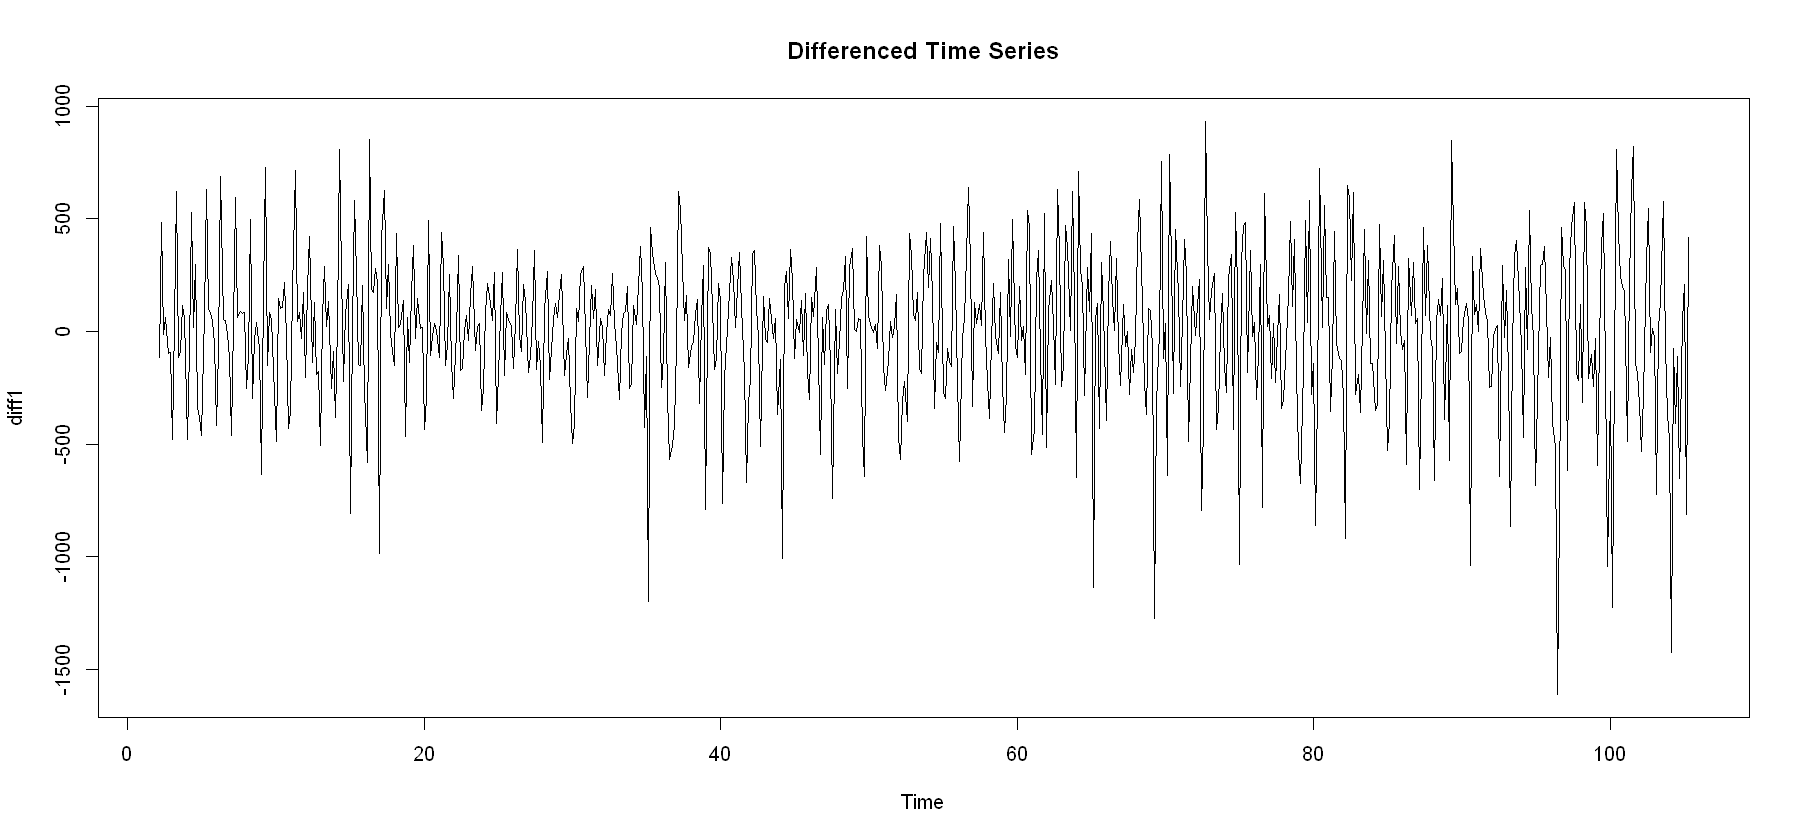

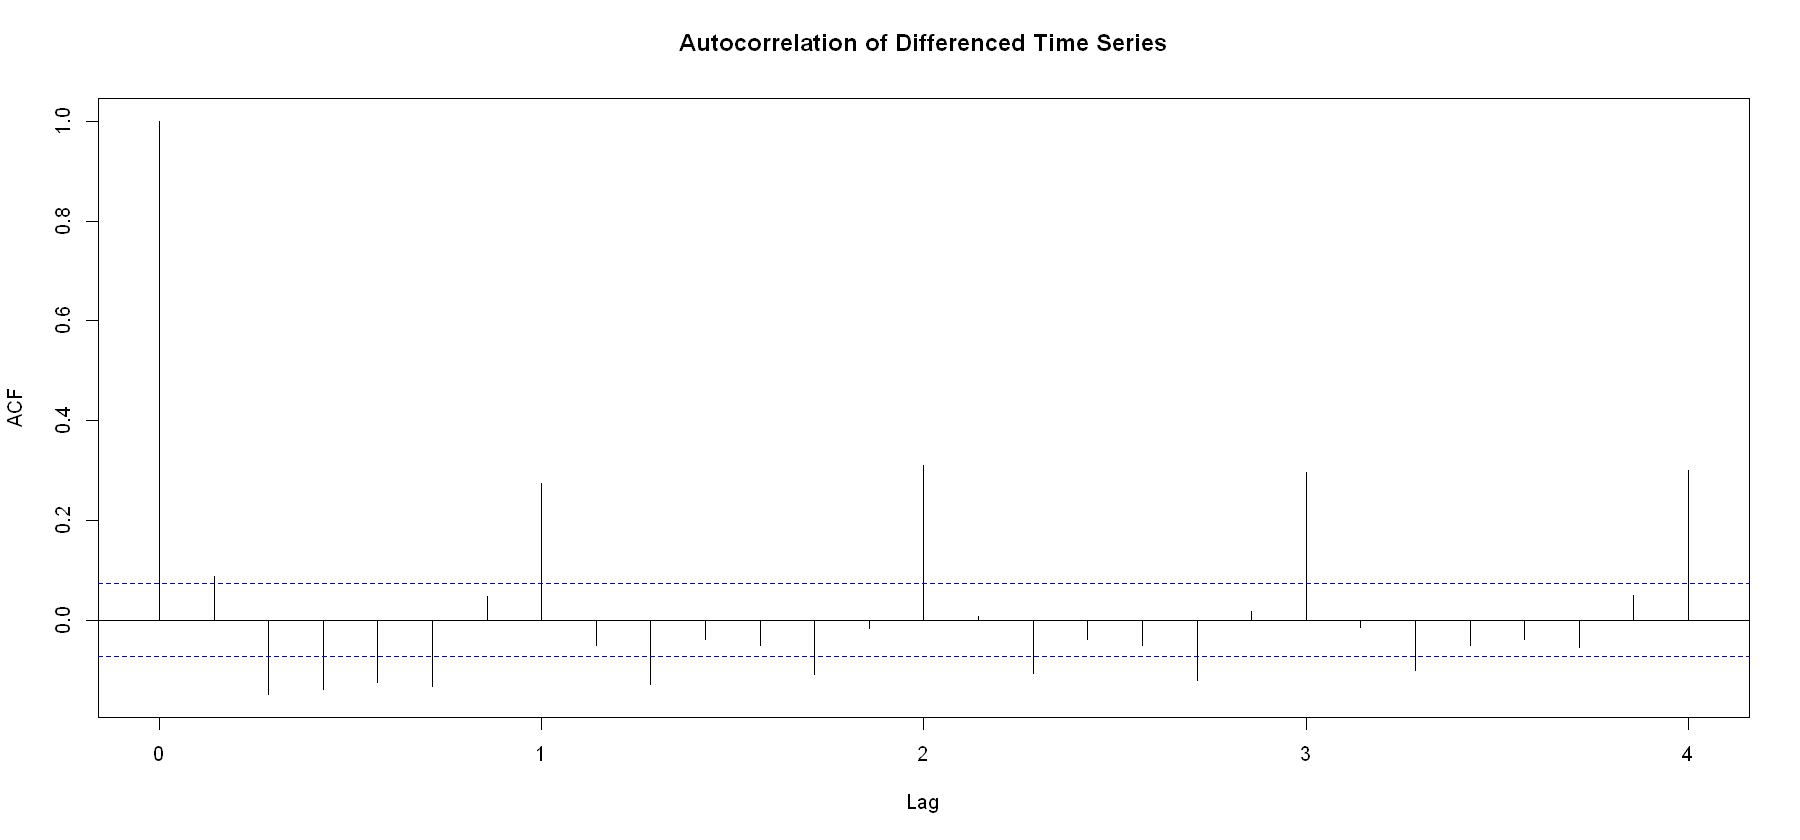

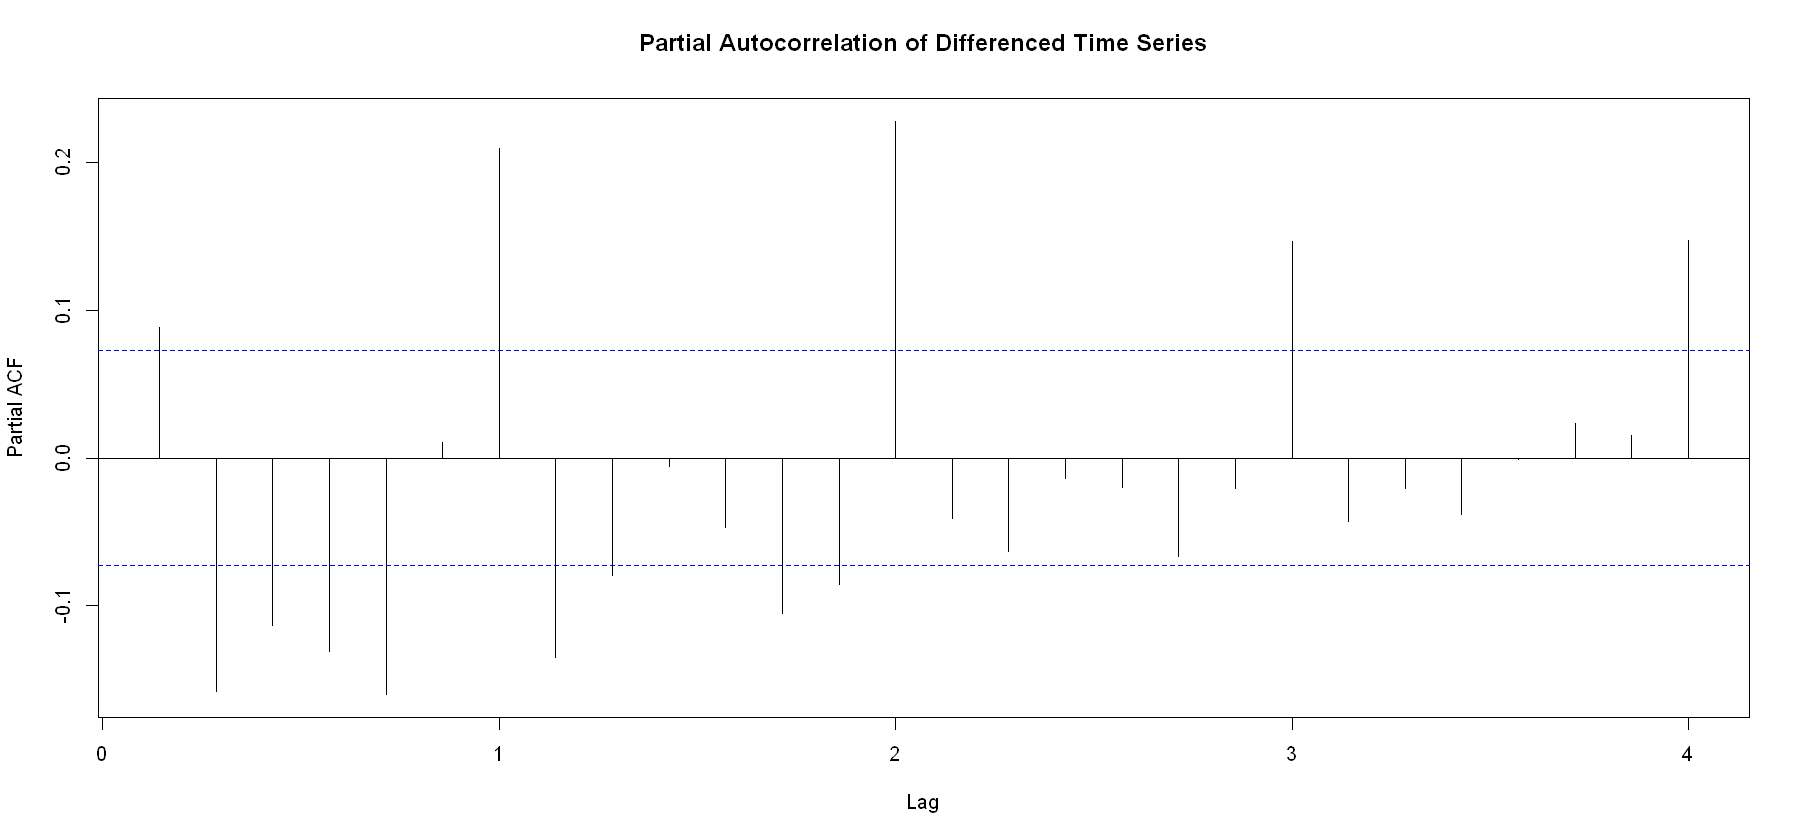

In [244]:
diff1 <- diff(ts_cnt_smoothed, differences = 1)

plot(diff1, main = "Differenced Time Series")
acf(diff1, main = "Autocorrelation of Differenced Time Series")
pacf(diff1, main = "Partial Autocorrelation of Differenced Time Series")
# ## Test for Stationarity
# adf_test <- adf.test(diff1, alternative='stationary')
# print(adf_test)

## ARIMA Model Candidates

### Candidate 1
- **AR order (p):** 0
- **Difference order (d):** 1
- **MA order (q):** 5

### Candidate 2
- **AR order (p):** 5
- **Difference order (d):** 1
- **MA order (q):** 0




	Ljung-Box test

data:  Residuals from ARIMA(0,1,5)
Q* = 127.51, df = 9, p-value < 2.2e-16

Model df: 5.   Total lags used: 14



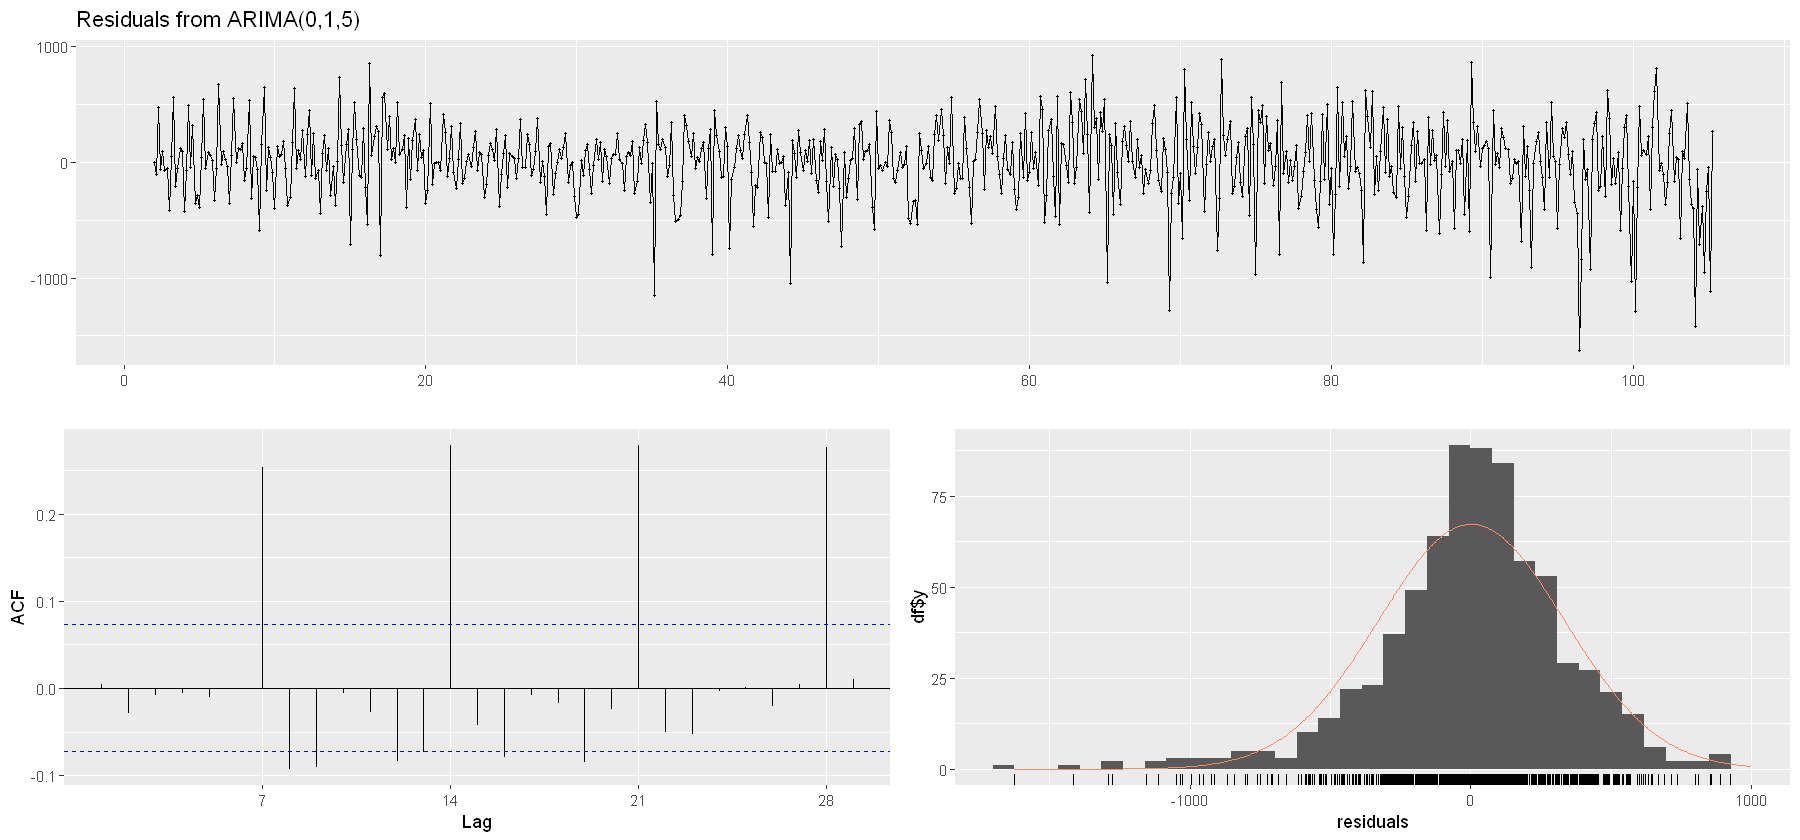


	Ljung-Box test

data:  Residuals from ARIMA(5,1,0)
Q* = 101.86, df = 9, p-value < 2.2e-16

Model df: 5.   Total lags used: 14

AIC for Candidate 1:  10458.45 
AIC for Candidate 2:  10449.14 


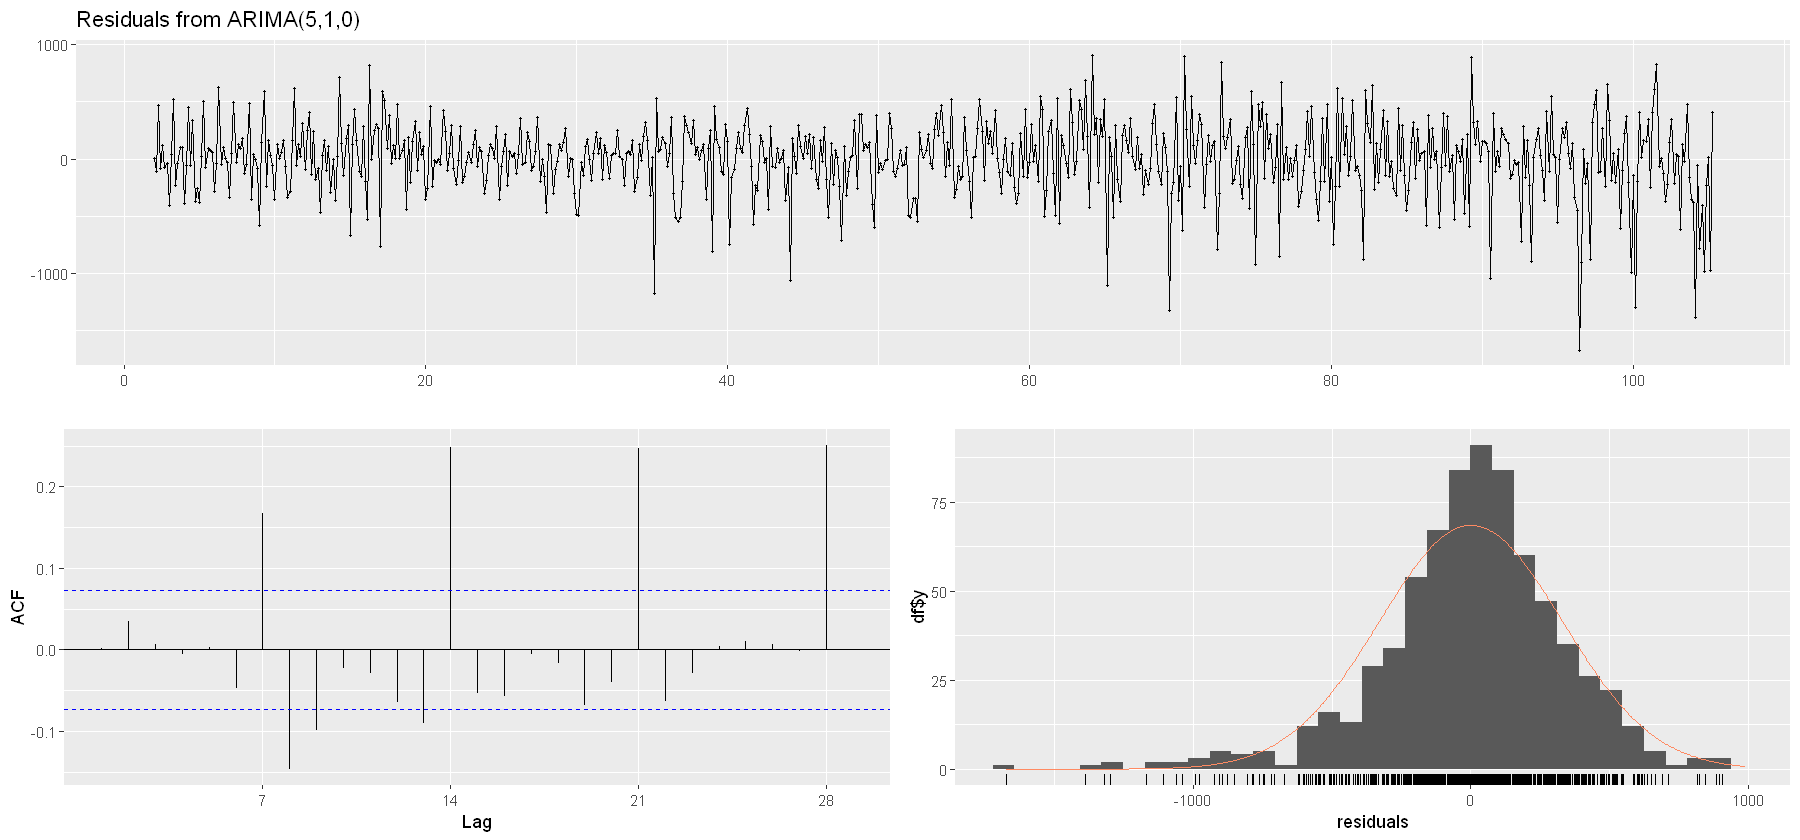

In [245]:
# Arima model

arima_model1 <- arima(ts_cnt_smoothed, order = c(0, 1, 5))
arima_model2 <- arima(ts_cnt_smoothed, order = c(5, 1, 0))
# Check residuals
checkresiduals(arima_model1)
checkresiduals(arima_model2)

# Compare AIC
aic1 <- AIC(arima_model1)
aic2 <- AIC(arima_model2)

cat("AIC for Candidate 1: ", aic1, "\n")
cat("AIC for Candidate 2: ", aic2, "\n")


# ARIMA Model Selection

Two candidate models fitted to the data. Residuals checked for each model. Akaike Information Criterion (AIC) compared for each model. The model with the lower AIC is generally preferred as it explains the data well while using fewer features.

AIC values for candidate models:

- **Candidate 1: ARIMA(0, 1, 5)**: AIC = 10458.45
- **Candidate 2: ARIMA(5, 1, 0)**: AIC = 10449.14

Given these results, **Candidate 2: ARIMA(5, 1, 0)** is the preferred model. It has the lower AIC value. This means that it provides a better fit to the data.


# **Part 4: Forecasting with ARIMA Models**

### **I.Fit an ARIMA model on de-seasonal cnt**

Test for Stationarity   


	Augmented Dickey-Fuller Test

data:  data_ts
Dickey-Fuller = -1.6351, Lag order = 9, p-value = 0.7327
alternative hypothesis: stationary



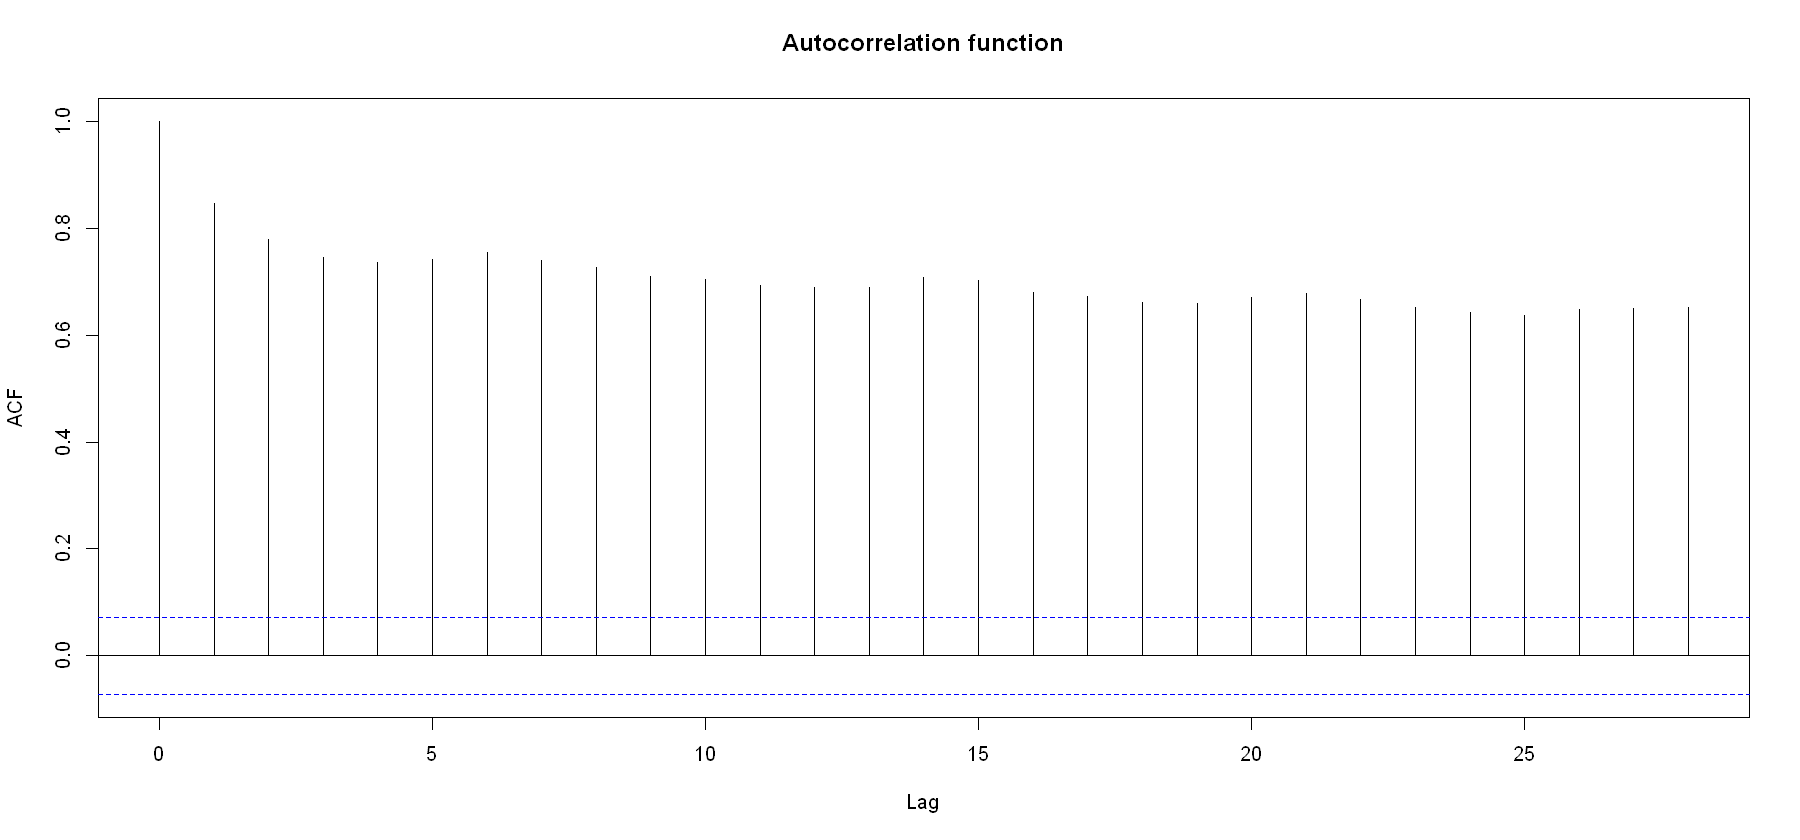

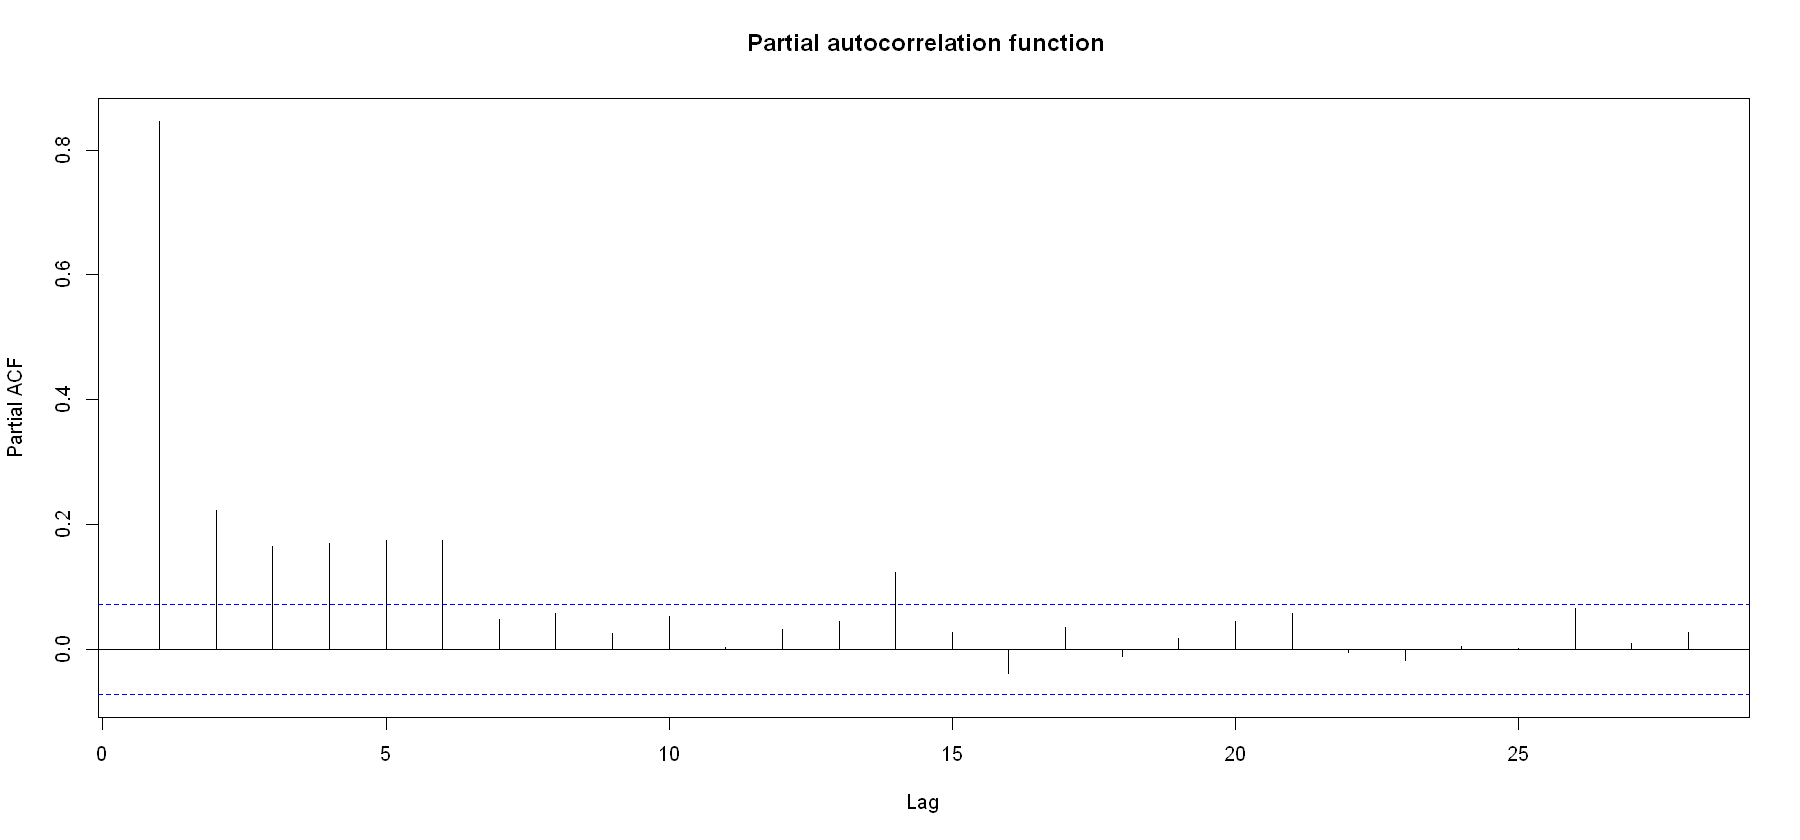

In [246]:
## Time series analysis
data_ts <- ts(day[,'cnt'], start = c(2011, 1, 1), frequency = 7)
## Test for Stationarity
adf_test <- adf.test(data_ts, alternative='stationary')
print(adf_test)
## ACF and PACF for seasonal series
acf_ts <- acf(data_ts[1:length(data_ts)], plot = FALSE)
plot(acf_ts,  main = "Autocorrelation function")

pacf_ts <- pacf(data_ts[1:length(data_ts)], plot = FALSE)
plot(pacf_ts,  main = " Partial autocorrelation function")

the time series is not stationary, in the next step i make it Stationary by Seasonal Difference

Warning message in adf.test(stat_diff, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  stat_diff
Dickey-Fuller = -13.798, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


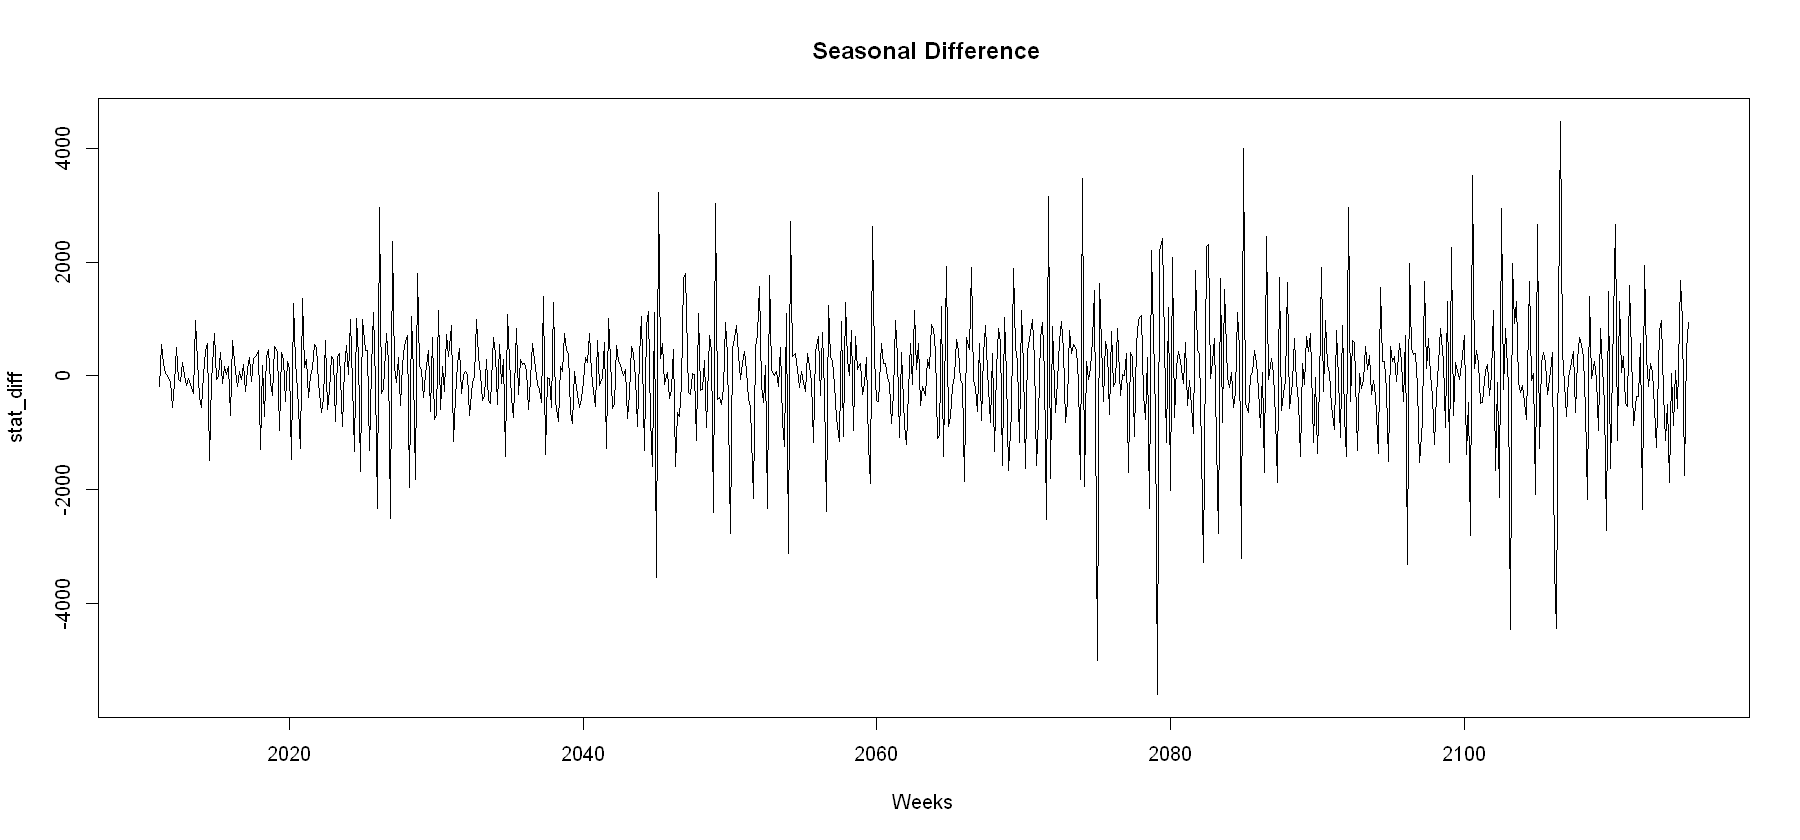

In [247]:
## Non-Stationary to Stationary by Seasonal Difference
stat_diff <- diff(data_ts, differences = 1)
plot(stat_diff, main = " Seasonal Difference", xlab= "Weeks")
adf_test <- adf.test(stat_diff, alternative = 'stationary')
adf_test

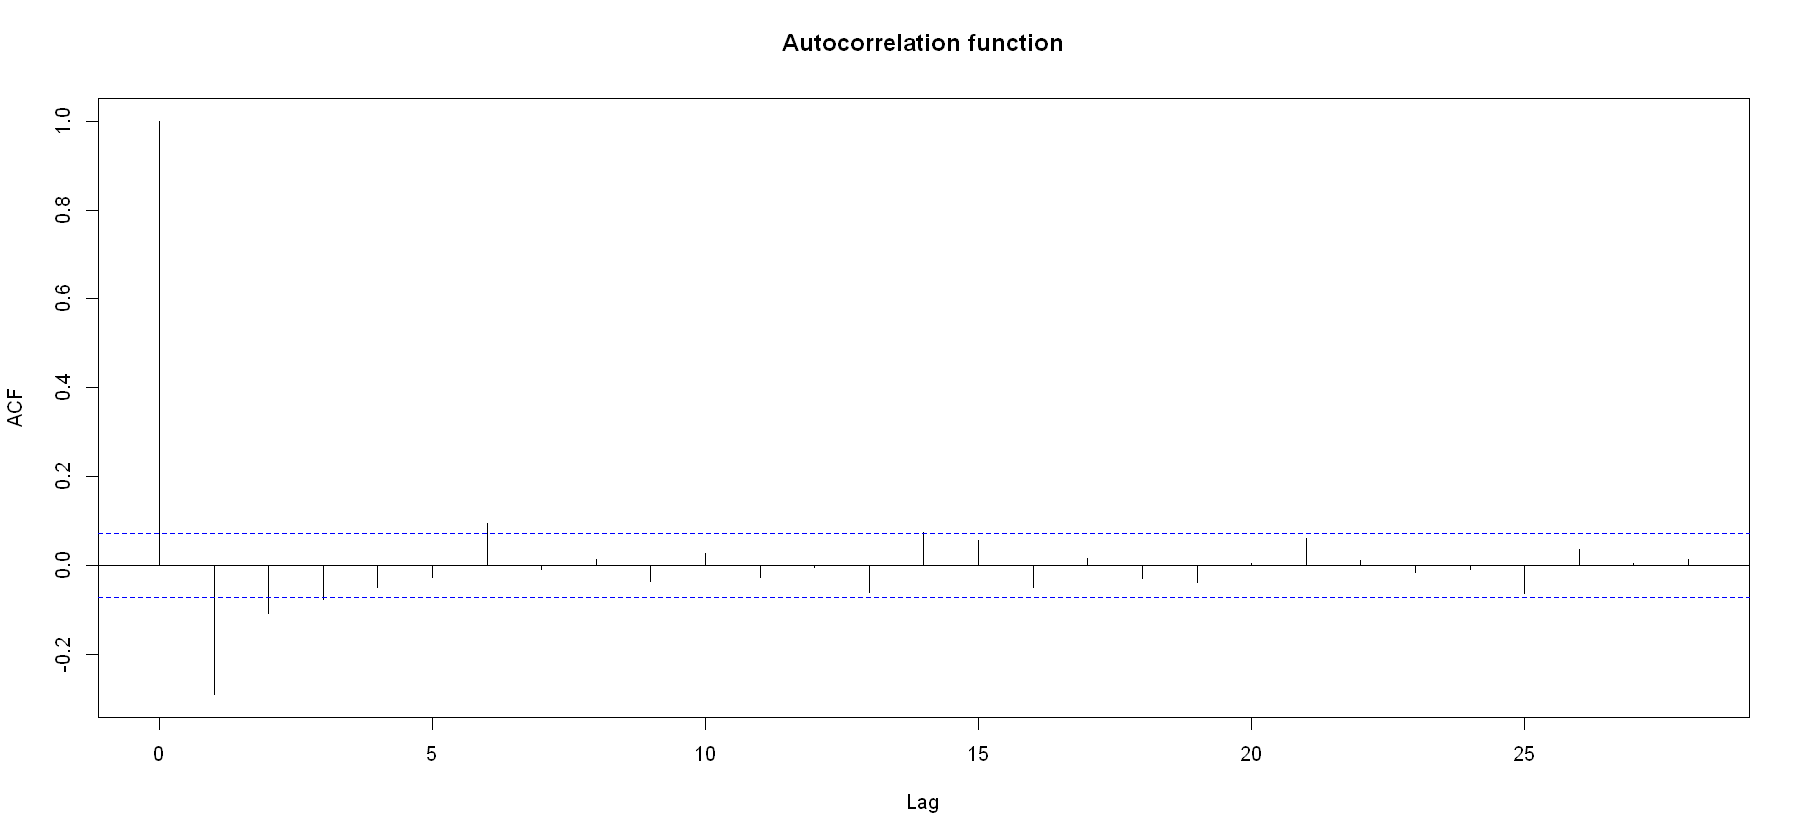

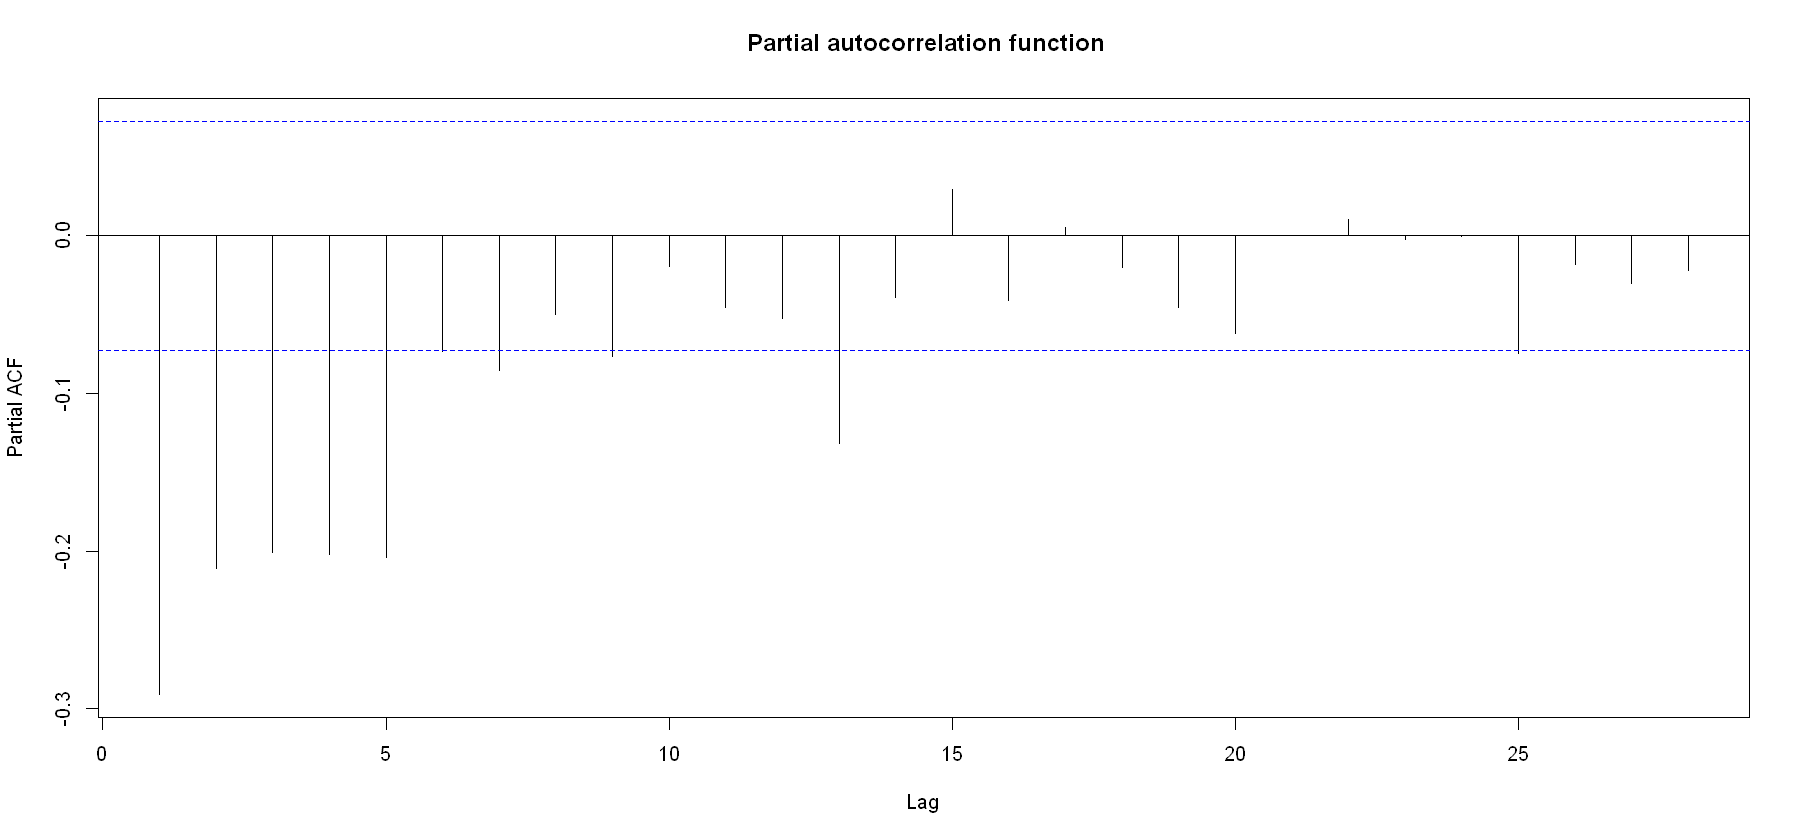

In [248]:
## ACF and PACF for non seasonal series
acf_ts <- acf(stat_diff[1:length(stat_diff)], plot = FALSE)
plot(acf_ts,  main = "Autocorrelation function")

pacf_ts <- pacf(stat_diff[1:length(stat_diff)], plot = FALSE)
plot(pacf_ts,  main = " Partial autocorrelation function")

The times series became stationary after making one diffrence

## ARIMA Model Candidates

### Candidate 1
- **AR order (p):** 0
- **Difference order (d):** 1
- **MA order (q):** 3

### Candidate 2
- **AR order (p):** 6
- **Difference order (d):** 1
- **MA order (q):** 0



	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)
Q* = 14.88, df = 11, p-value = 0.188

Model df: 3.   Total lags used: 14



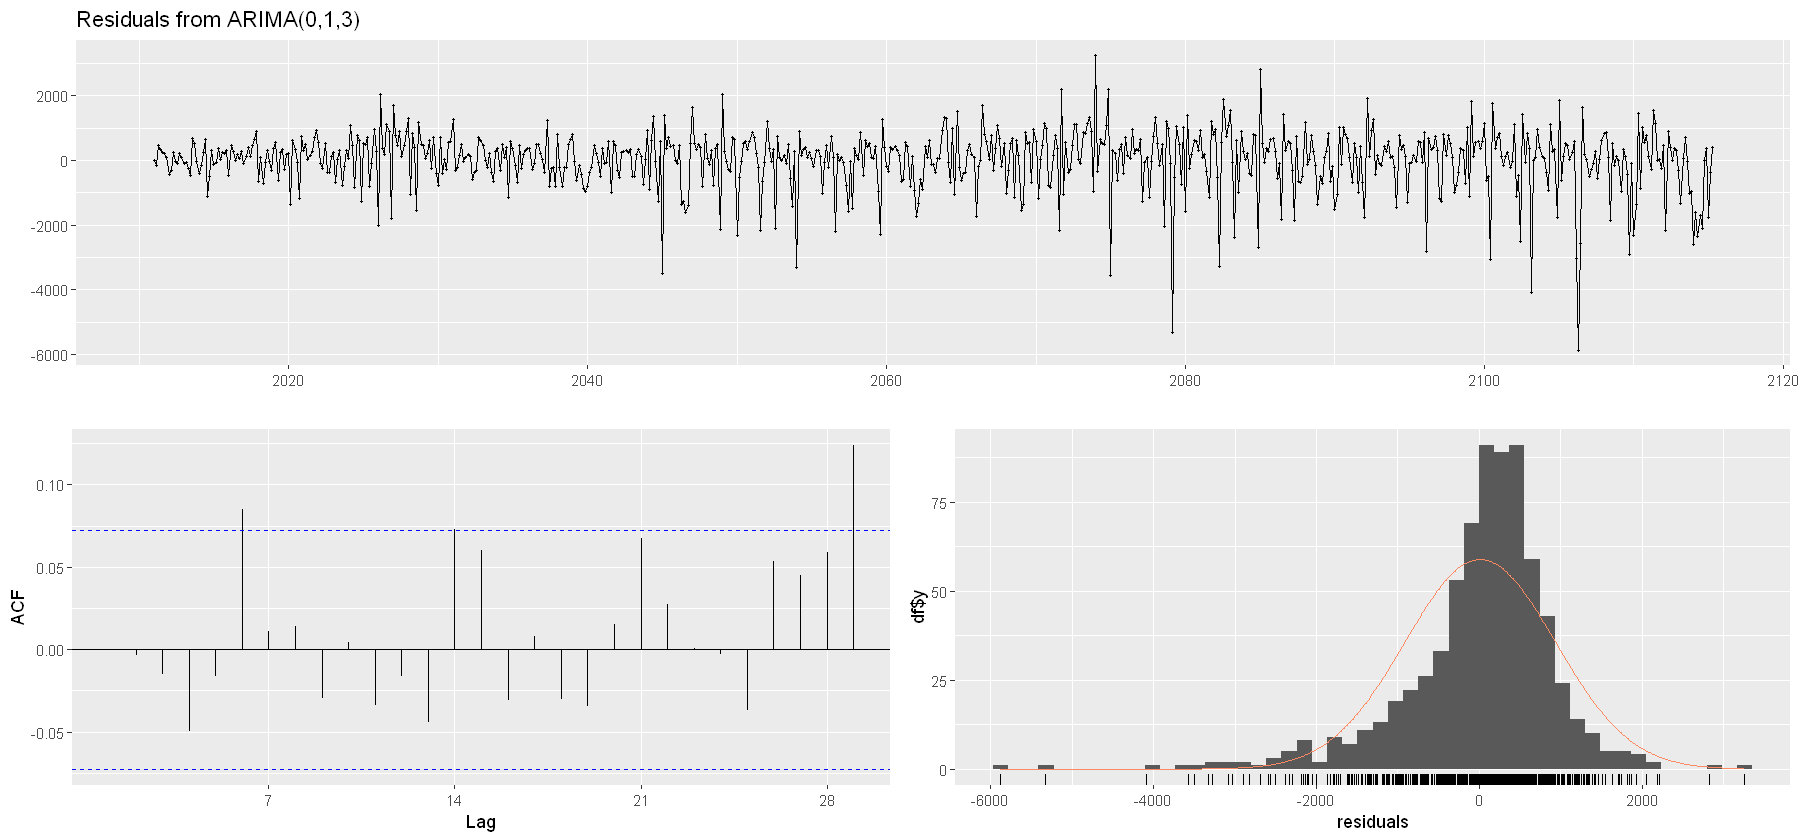


	Ljung-Box test

data:  Residuals from ARIMA(6,1,0)
Q* = 21.257, df = 8, p-value = 0.006496

Model df: 6.   Total lags used: 14

AIC for Candidate 1:  12050 
AIC for Candidate 2:  12068.55 


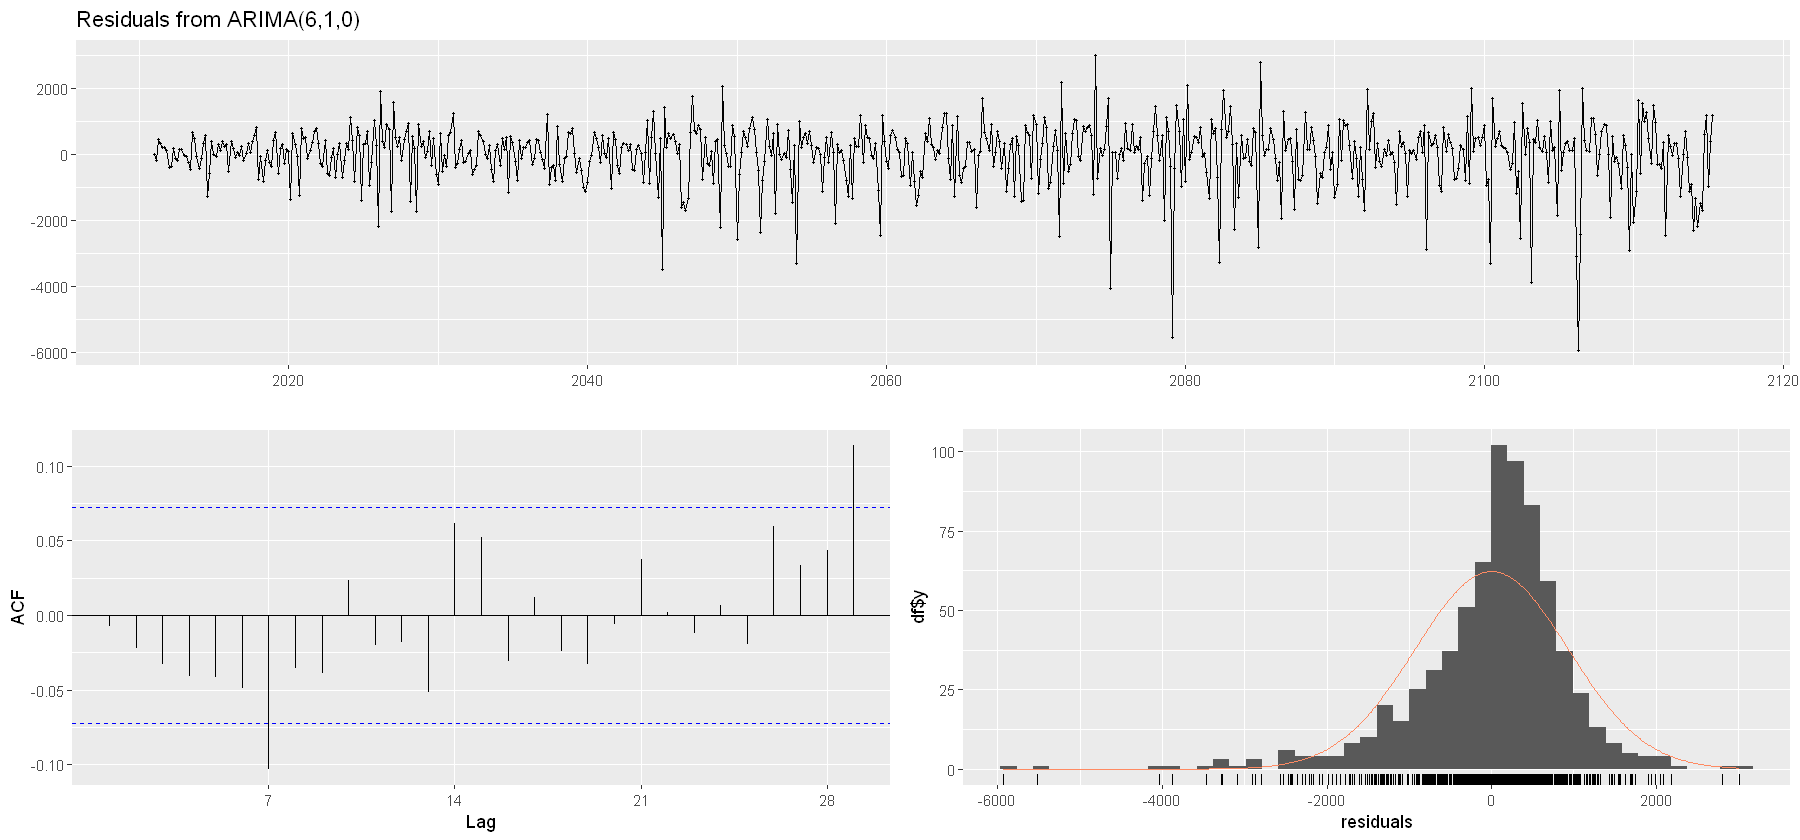

In [249]:
# Arima model

arima_model1 <- arima(data_ts, order = c(0, 1, 3))
arima_model2 <- arima(data_ts, order = c(6, 1, 0))
# Check residuals
checkresiduals(arima_model1)
checkresiduals(arima_model2)

# Compare AIC
aic1 <- AIC(arima_model1)
aic2 <- AIC(arima_model2)

cat("AIC for Candidate 1: ", aic1, "\n")
cat("AIC for Candidate 2: ", aic2, "\n")


# ARIMA Model Analysis

## . Best Model
According to the AIC criterion, **ARIMA(0, 1, 3)** would be the best model. Also, considering the complexity of the model and the principle of Occam's razor, This model is simpler in terms of the number of parameters.

## . Conclusion
The bike rentals time series can be effectively modeled by an **ARIMA(0, 1, 3)** model. This model accounts for the non-stationarity and seasonality of the data.


## **II. Fiting an ARIMA with Auto-ARIMA**

In [250]:
# Fit an ARIMA with Auto-ARIMA
auto_arima_model <- auto.arima(data_ts)

# Print the model summary
print(auto_arima_model)

Series: data_ts 
ARIMA(1,1,1)(1,0,2)[7] 

Coefficients:
         ar1      ma1    sar1     sma1    sma2
      0.3612  -0.9005  0.9106  -0.9035  0.0545
s.e.  0.0427   0.0205  0.0760   0.0865  0.0417

sigma^2 = 844004:  log likelihood = -6014.88
AIC=12041.75   AICc=12041.87   BIC=12069.31



	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,0,2)[7]
Q* = 10.334, df = 9, p-value = 0.3241

Model df: 5.   Total lags used: 14



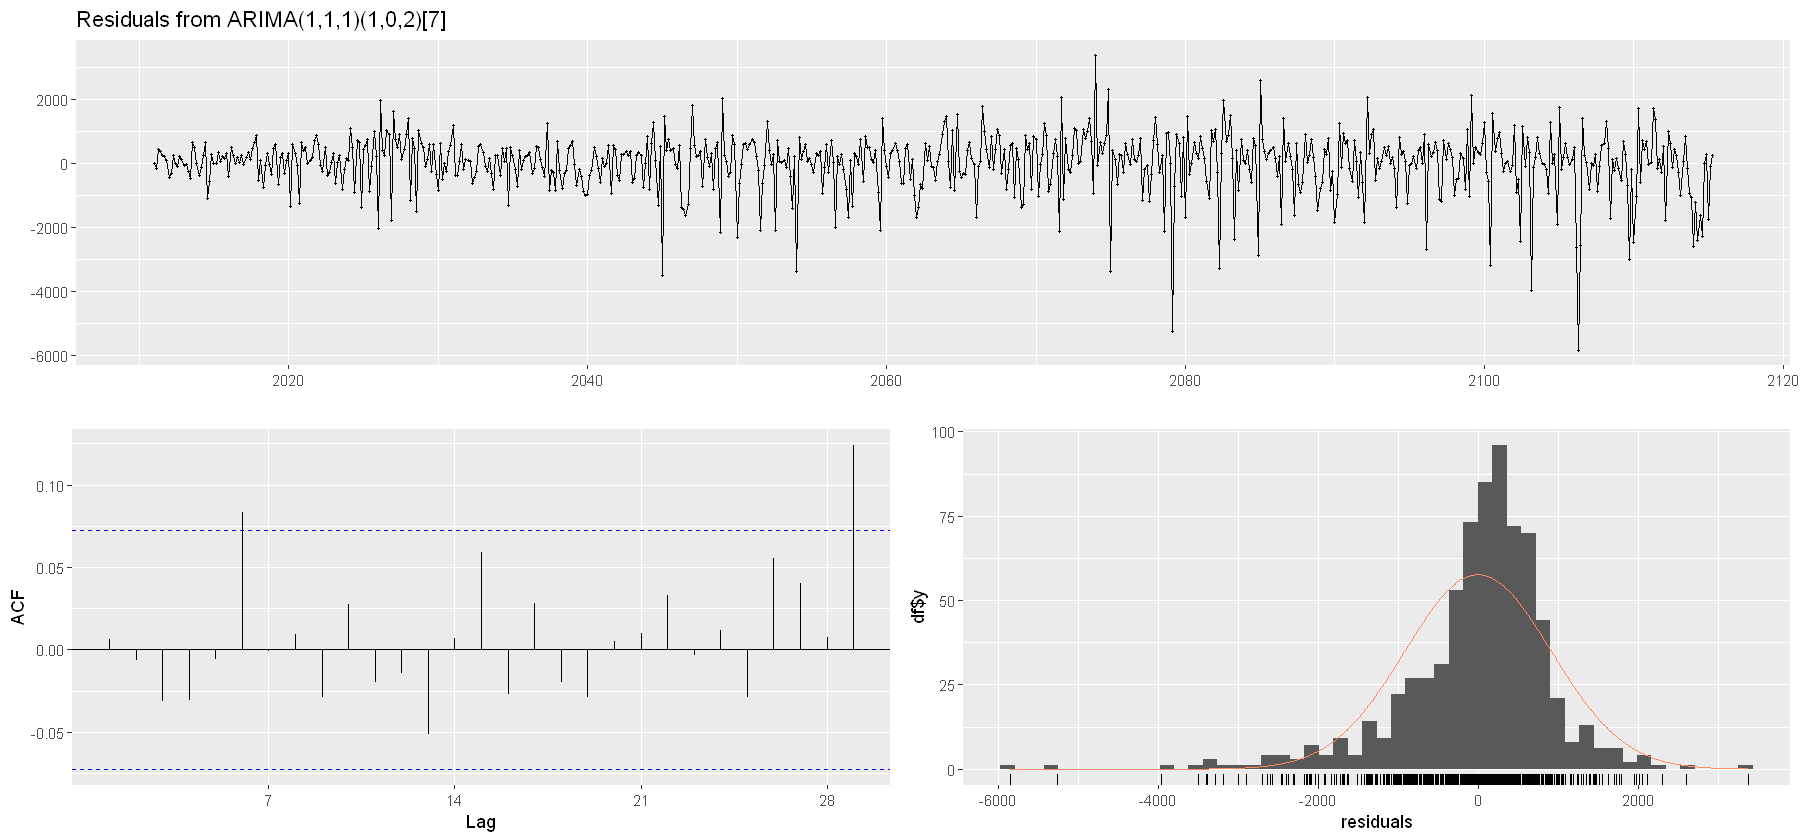

In [251]:
# Check residuals
checkresiduals(auto_arima_model)


# Auto-ARIMA Model Analysis

## Residual Analysis
Based on the results and the residual plots provided, it appears that the ARIMA(1,1,1)(1,0,2)[7] model has been fairly successful in capturing the underlying process of the data. The analysis of the residuals shows:

- **Random Distribution:** The residuals over time seem to be randomly distributed around zero without any apparent pattern or trend, indicating that the model has captured most of the systematic information in the data.
- **No Significant Autocorrelation:** The Auto Correlation Function (ACF) plot does not show significant autocorrelations for lag values, suggesting that there is no significant serial correlation left in the residuals.
- **Normal Distribution:** The histogram with a superimposed normal curve indicates that residuals are approximately normally distributed.

## Conclusion
The ARIMA(1,1,1)(1,0,2)[7] model provides a good fit to the data, as evidenced by the analysis of the residuals. Both models have their merits. The ARIMA(3, 1, 0) model is simpler and may be easier to interpret, while the ARIMA(1,1,1)(1,0,2)[7] model provides a better fit to the data according to the AIC. The choice between these two models would depend on the specific requirements such as the need for simplicity versus the need for a better fit.


## **III.Evaluate and iterate**

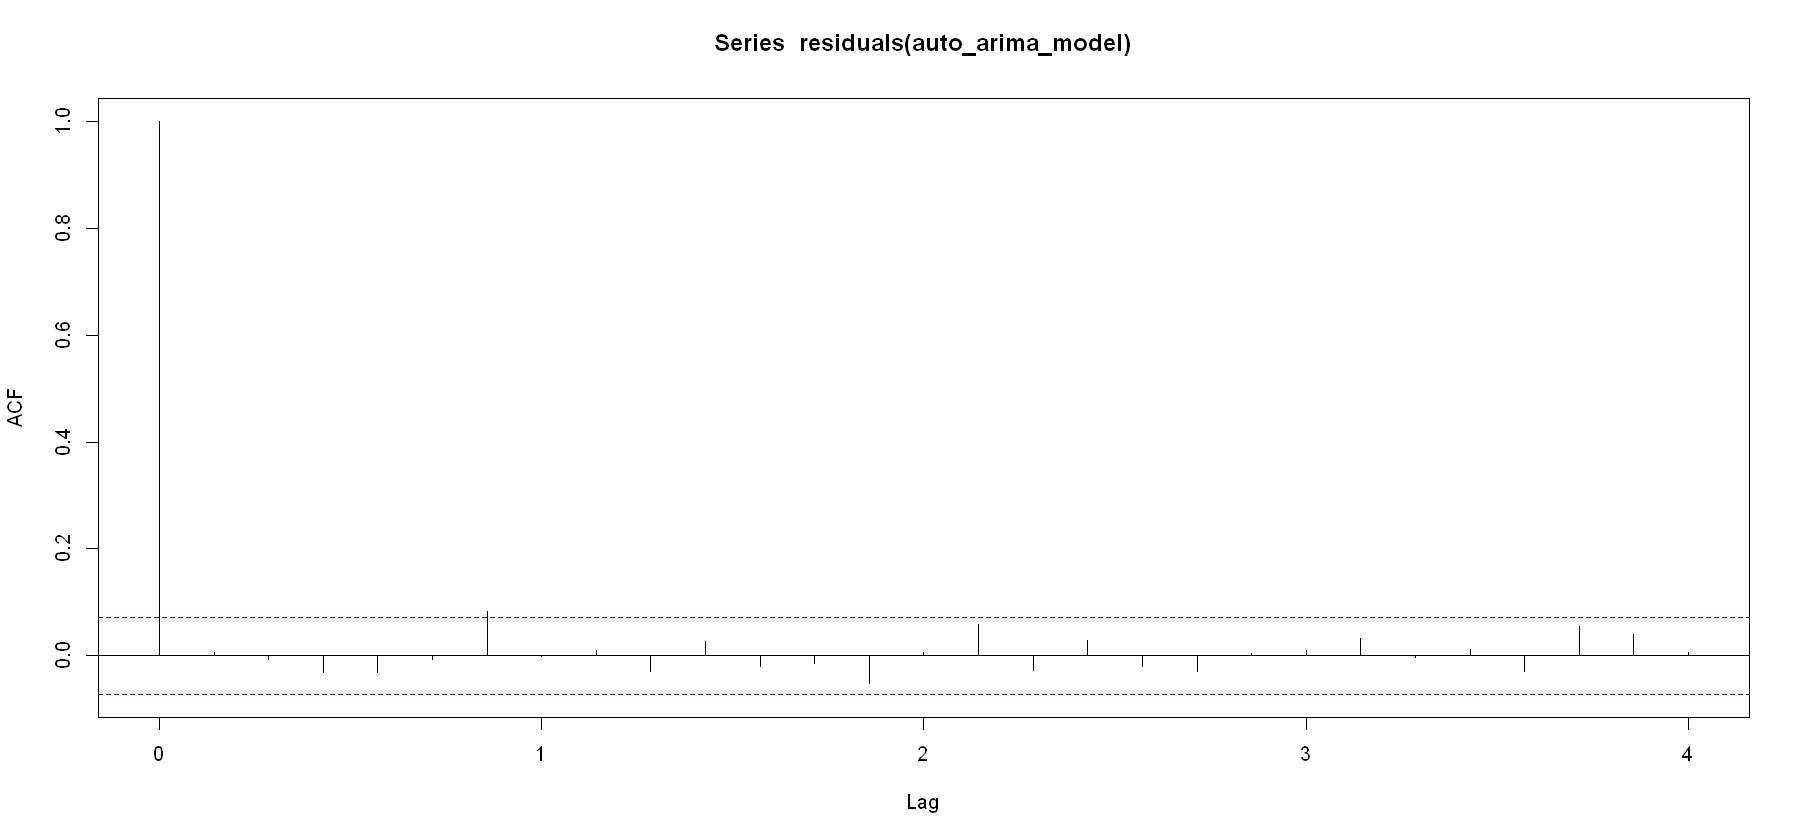

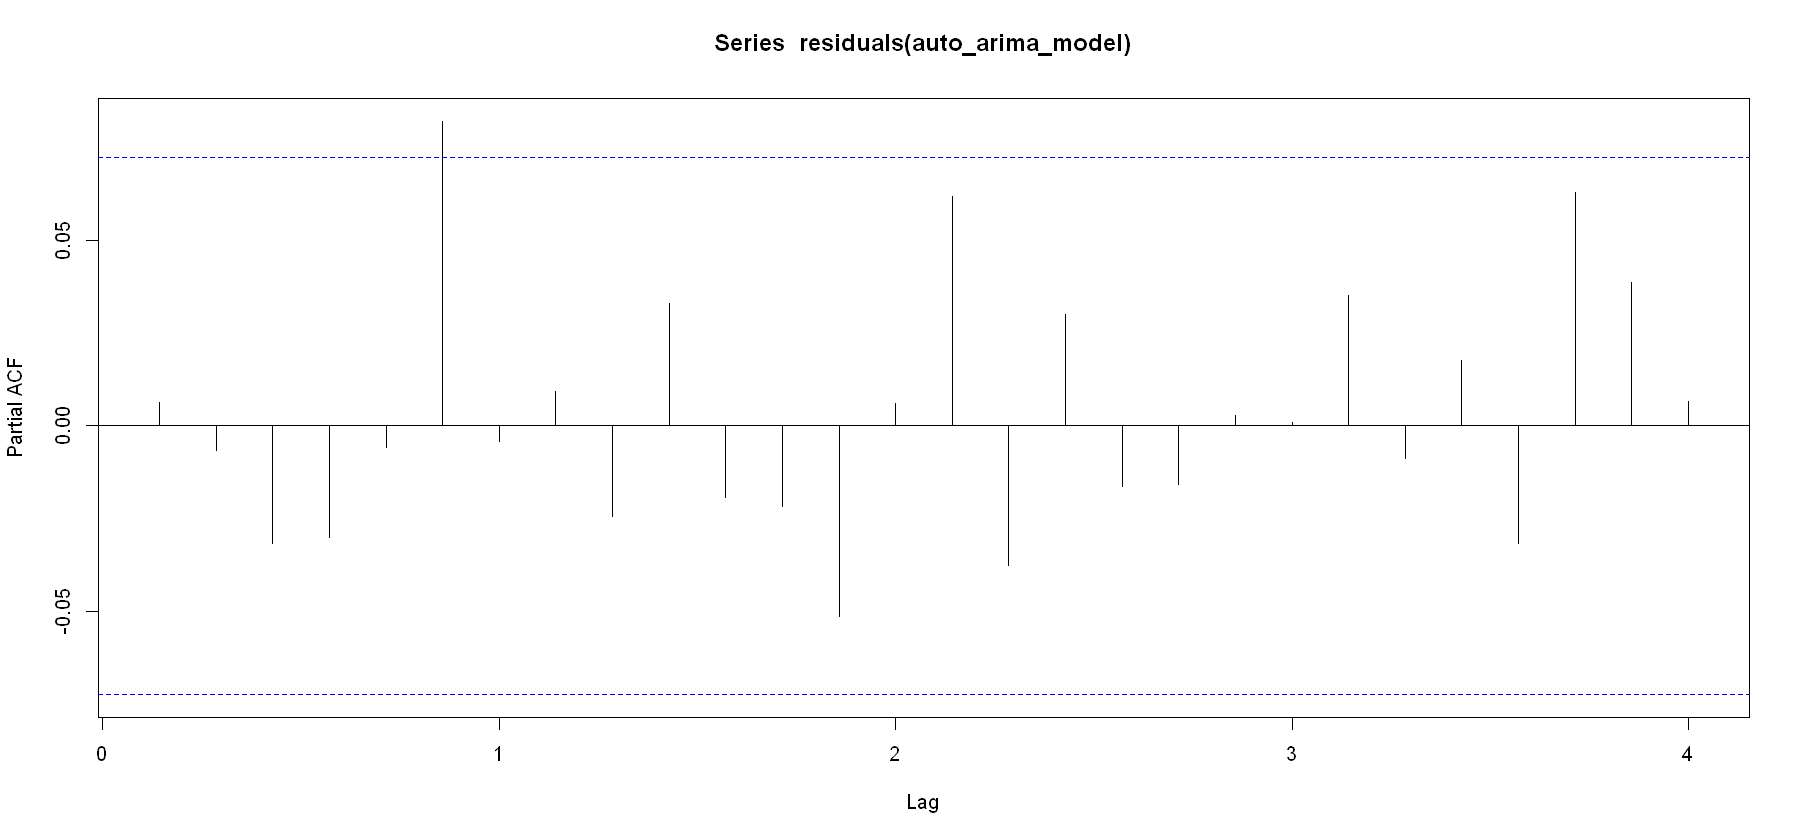

In [252]:
# Plot ACF/PACF
acf(residuals(auto_arima_model))
pacf(residuals(auto_arima_model))

### **Compare model errors and fit criteria**

In [253]:
AIC(auto_arima_model)
BIC(auto_arima_model)


[1] 12041.75

[1] 12069.31

There are no additional order parameters needed
### **Calculate forecast using the chosen model**

In [254]:
# Calculate forecast using the chosen model
forecast_values <- forecast(auto_arima_model, h = 100)

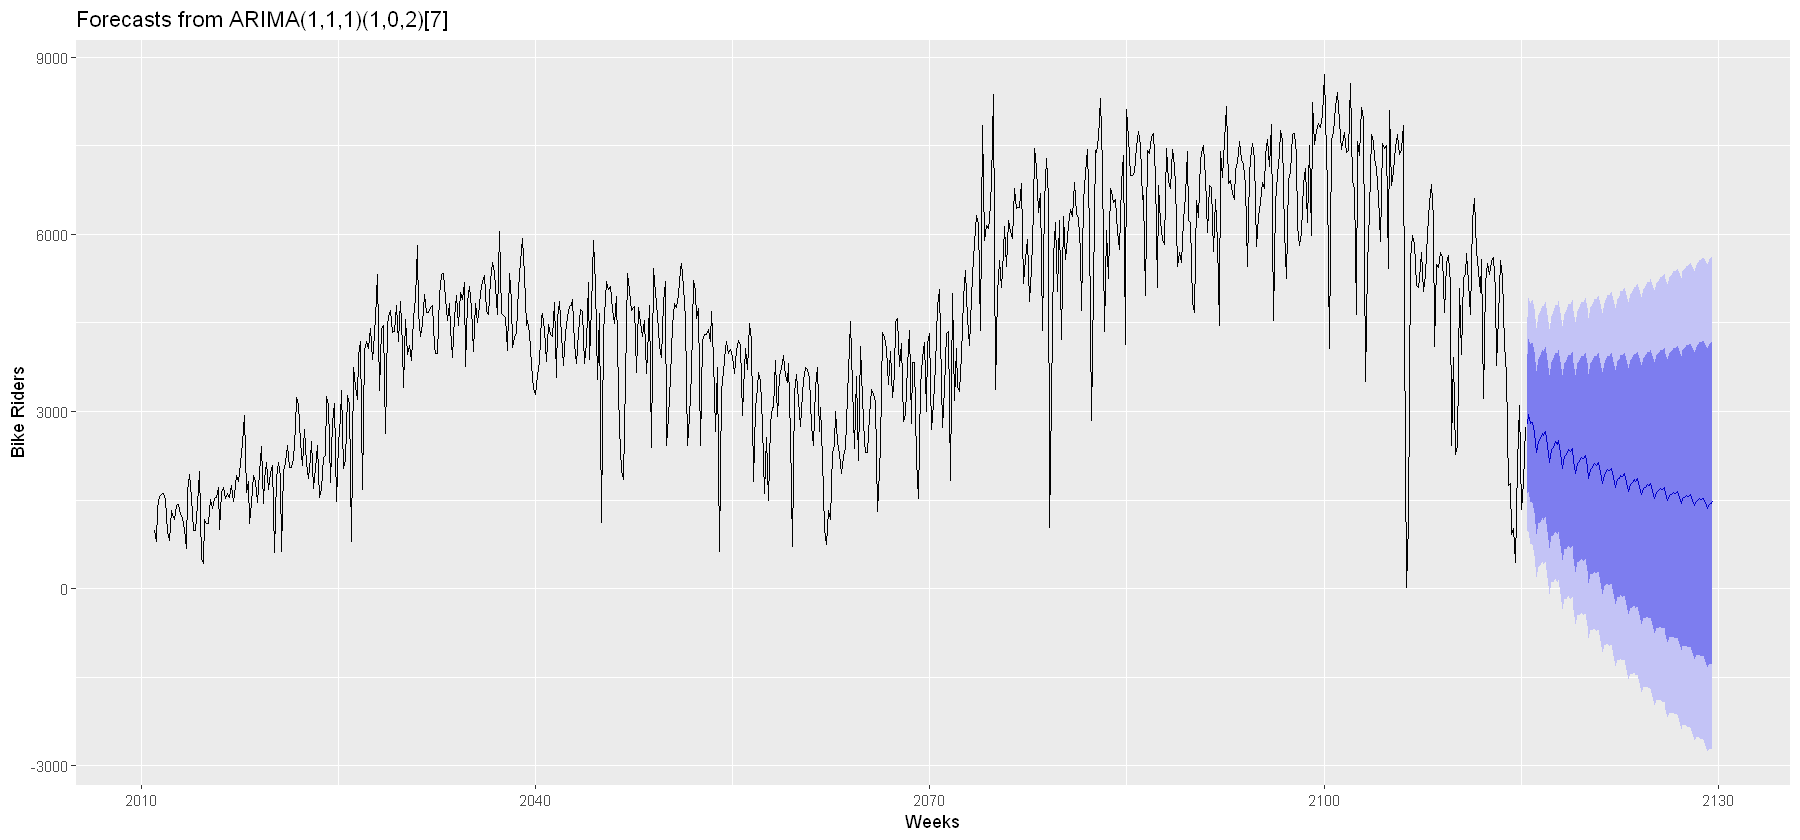

In [255]:

# Plot both the original and forecasted time series
autoplot(forecast_values, xlab="Weeks", ylab= "Bike Riders")



## **IV.Forecasting**

### Split the data into training and test times series

In [256]:
# Identify the start date of the 700th observation
end_date_train <- time(data_ts)[699]
start_date_test <- time(data_ts)[700]
# Create the training set
train_ts <- window(data_ts, end = end_date_train)
# Create the test set
test_ts <- window(data_ts, start = start_date_test)

length(train_ts)
length(test_ts)


[1] 699

[1] 32

### **Fitting an Arima model, manually and with Auto-Arima on the training part**

In [257]:
# Fit an ARIMA model
arima_model1 <- arima(train_ts, order = c(0, 1, 3))
arima_model2 <- arima(train_ts, order = c(6, 1, 0))
# test 
arima_model3 <- arima(train_ts, order=c(7,1,0),seasonal=c(6,1,0), method = "CSS", optim.method = "BFGS")


# Print the model summary
print(arima_model1)
print(arima_model2)
print(arima_model3)
# Fit an ARIMA with Auto-ARIMA
auto_arima_model <- auto.arima(train_ts)

# Print the model summary
print(auto_arima_model)


Call:
arima(x = train_ts, order = c(0, 1, 3))

Coefficients:
          ma1      ma2      ma3
      -0.5538  -0.2094  -0.0846
s.e.   0.0376   0.0431   0.0379

sigma^2 estimated as 832436:  log likelihood = -5748.57,  aic = 11505.13

Call:
arima(x = train_ts, order = c(6, 1, 0))

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6
      -0.5160  -0.4444  -0.4047  -0.3542  -0.2620  -0.0765
s.e.   0.0378   0.0415   0.0427   0.0428   0.0415   0.0379

sigma^2 estimated as 853083:  log likelihood = -5756.98,  aic = 11527.96

Call:
arima(x = train_ts, order = c(7, 1, 0), seasonal = c(6, 1, 0), method = "CSS", 
    optim.method = "BFGS")

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6     ar7     sar1
      -0.5762  -0.5447  -0.4638  -0.4459  -0.3777  -0.2735  0.0321  -1.1928
s.e.   0.0395   0.0456   0.0466   0.0503   0.0511   0.0593  0.0554   0.0836
         sar2     sar3     sar4     sar5     sar6
      -1.0831  -0.8572  -0.6210  -0.3903  -0.191

### **Forecasting the next 25 observation and plot the original ts and the forecasted one.**

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,33.28925,911.7264,638.5085,-44.84936,59.18329,0.700713,-0.003248001,NA
Test set,-23.37416,1400.4068,1074.5000,-24.93434,43.42400,1.179179,0.613874716,2.415054


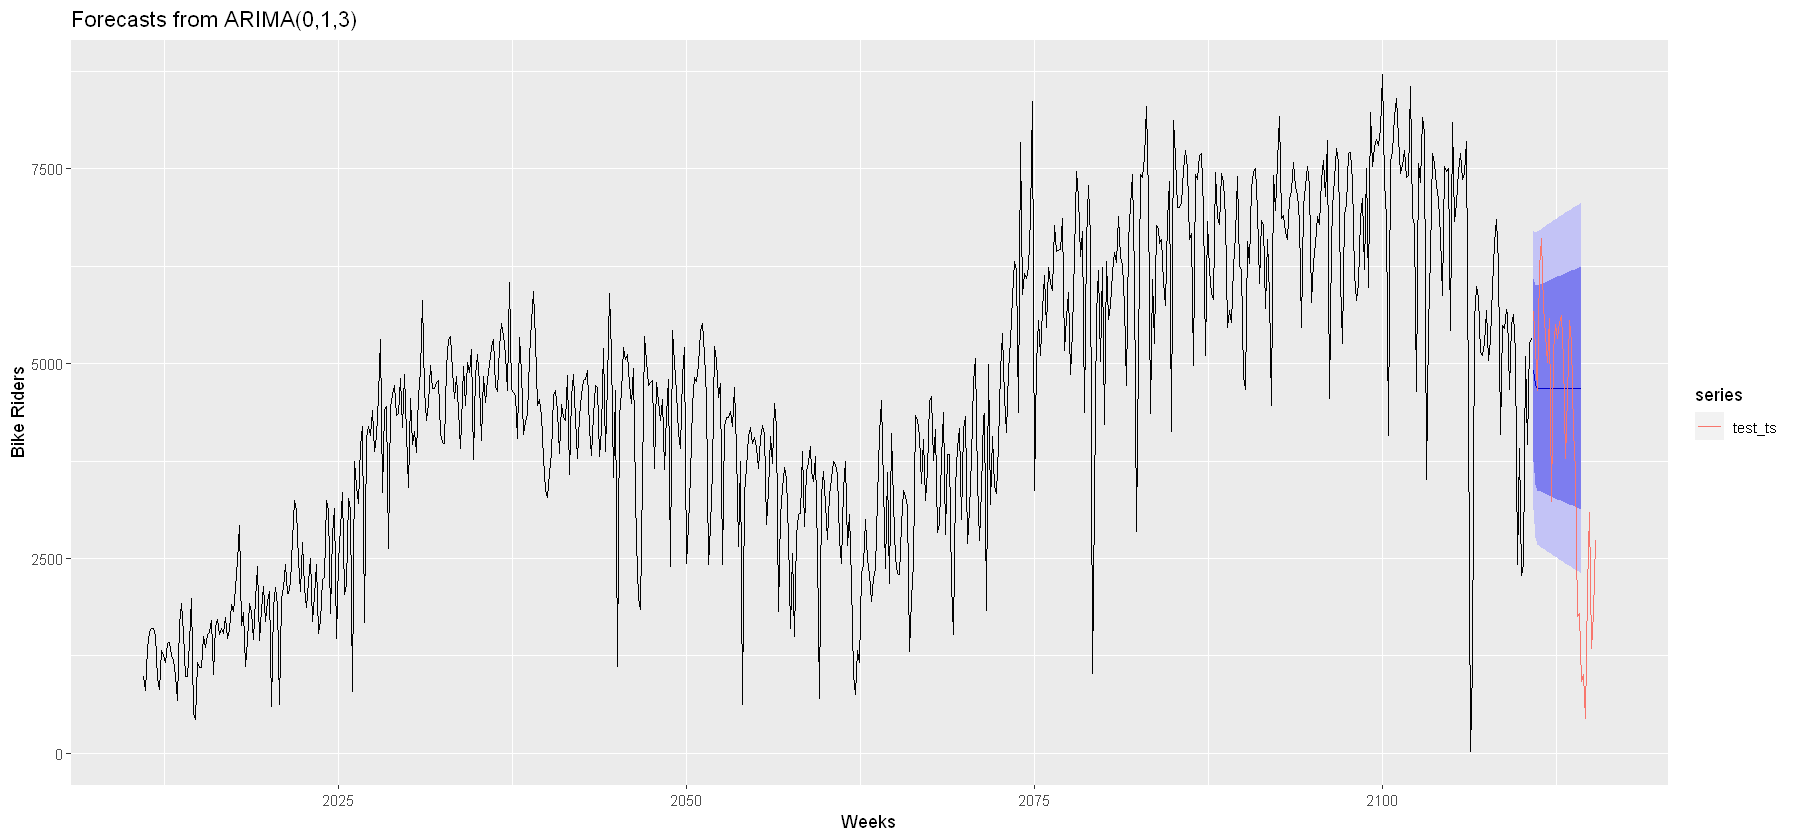

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,14.85009,922.9639,646.4092,-45.57864,59.88567,0.7093834,-0.009593865,NA
Test set,250.78371,1432.4568,1198.8736,-17.86099,43.81342,1.3156697,0.613272177,2.288656


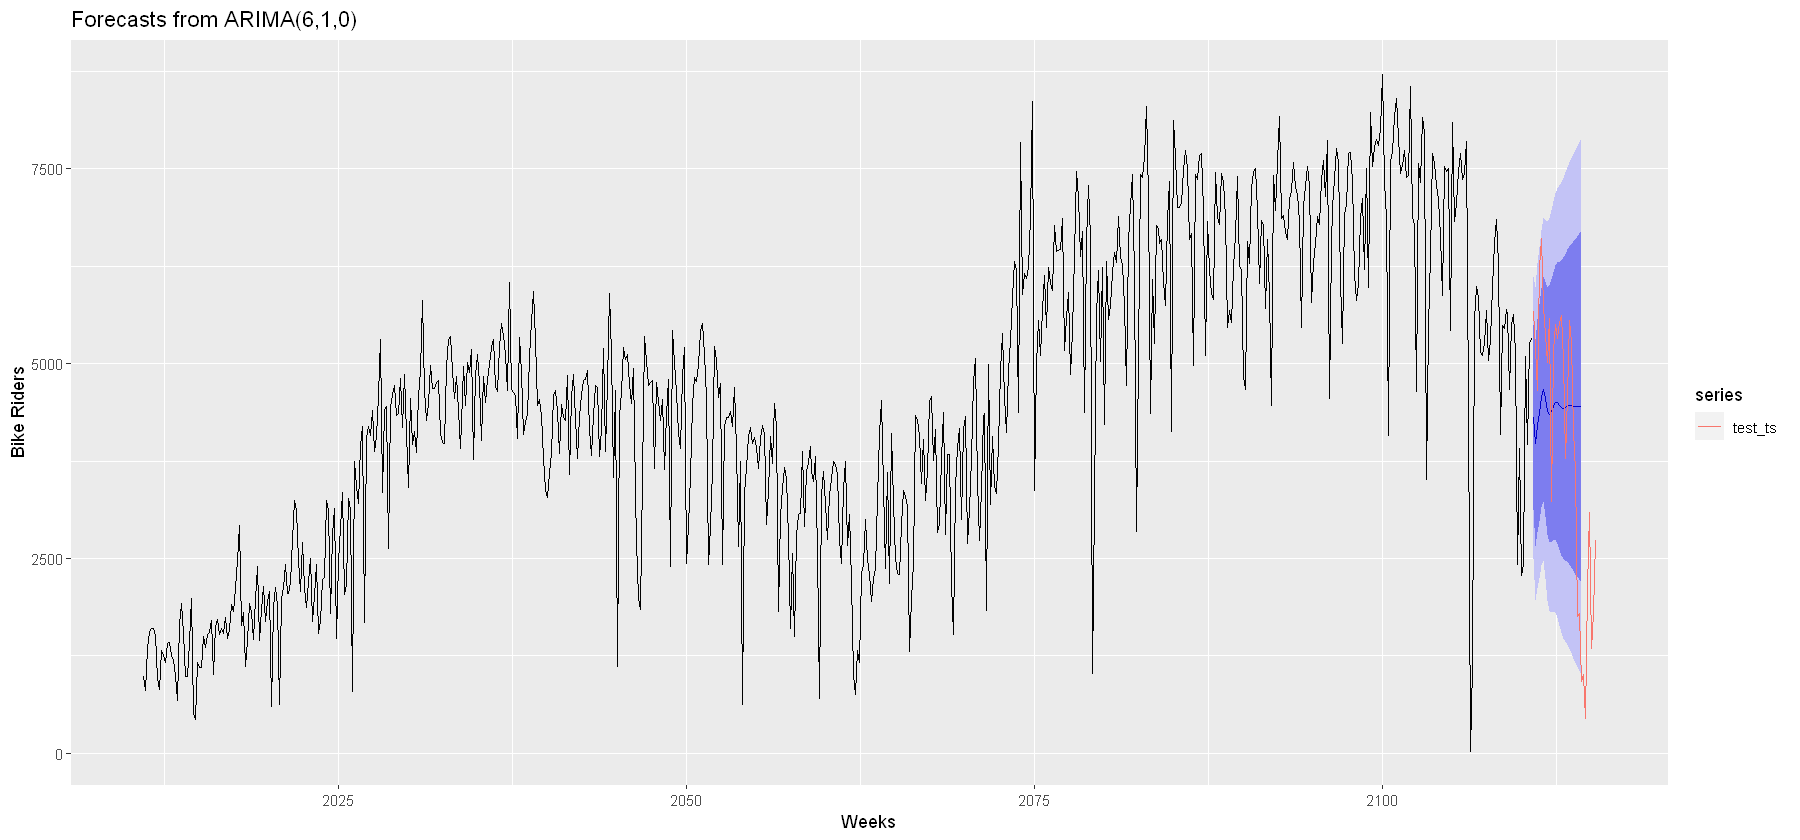

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-13.73454,943.9587,644.3172,-44.36076,57.13825,0.7070876,0.0007073105,NA
Test set,1218.21114,1752.4679,1570.3673,11.38505,40.99241,1.7233549,0.4845188871,1.835026


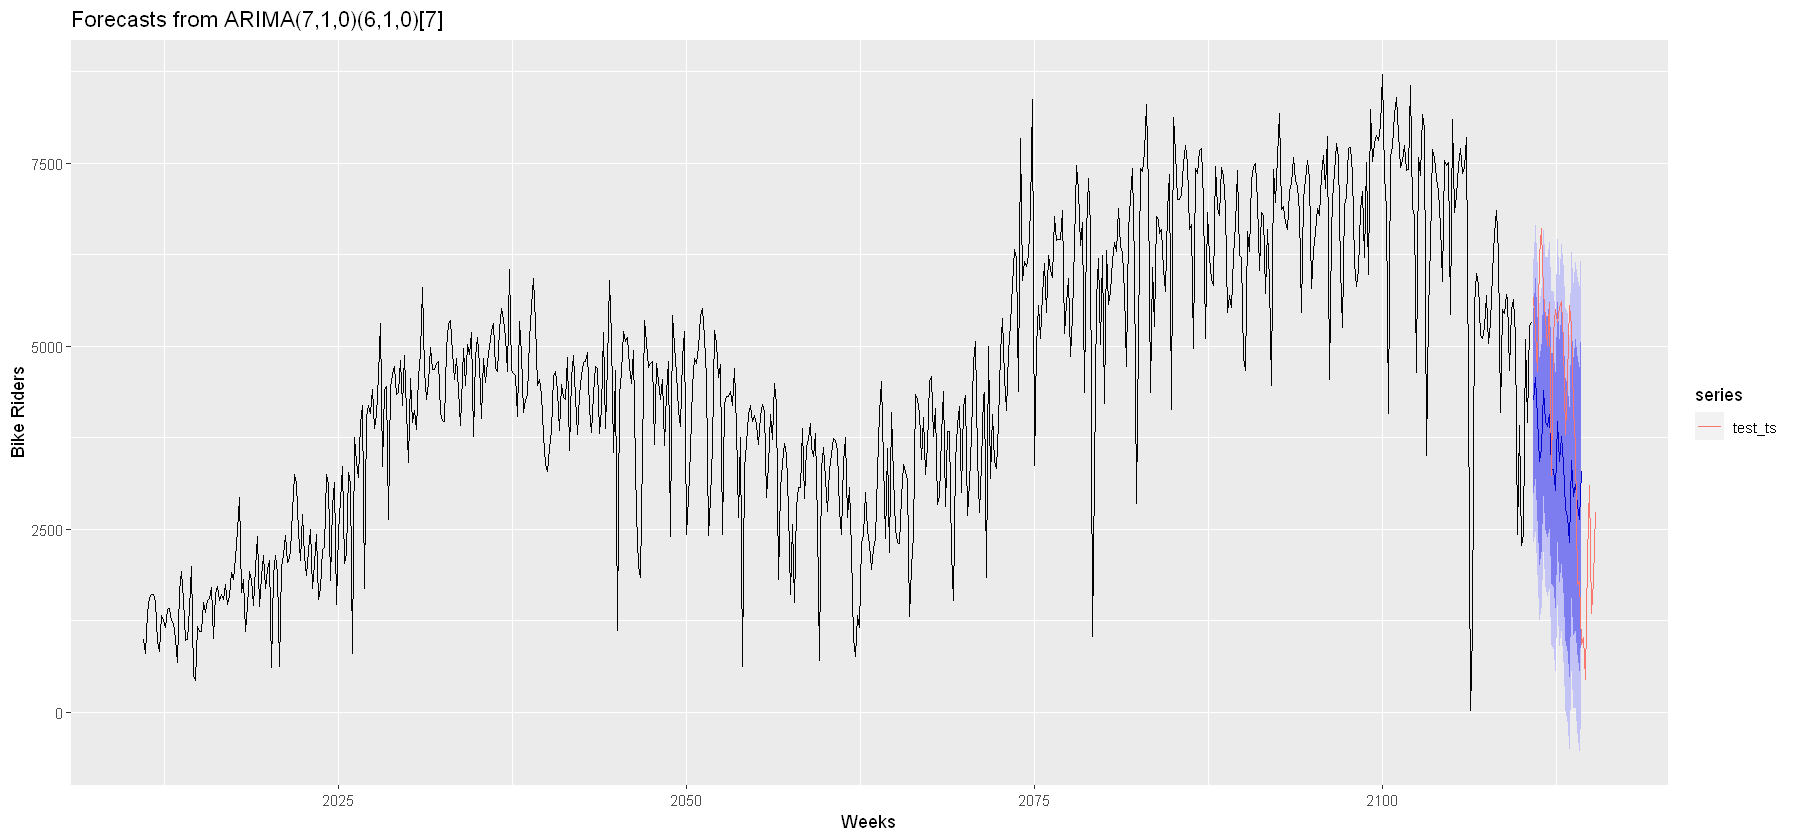

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,27.55152,904.2872,631.8413,-45.08526,59.24920,0.6933963,0.005227246,NA
Test set,227.15175,1411.8955,1166.6226,-18.24750,43.09292,1.2802767,0.615580795,2.280662


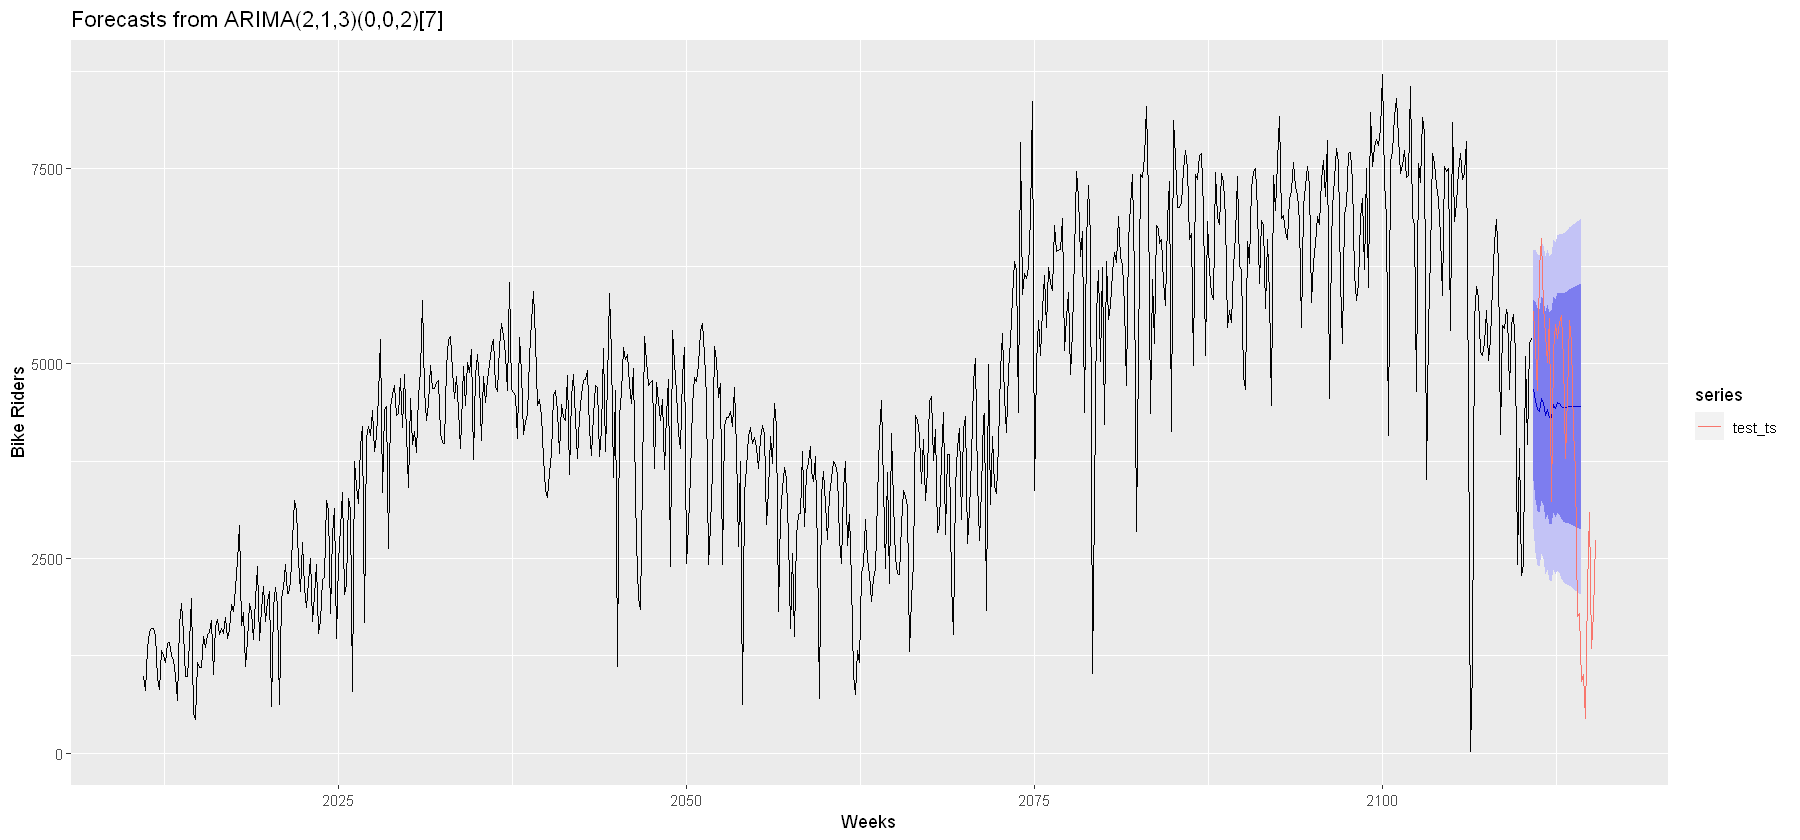

In [258]:


# Generate the forecasts
forecast_ts_arima_model1 <- forecast(arima_model1, h = 25)
forecast_ts_arima_model2 <- forecast(arima_model2, h = 25)
forecast_ts_arima_model3 <- forecast(arima_model3, h = 25)
forecast_ts_auto_arima <- forecast(auto_arima_model, h = 25)

# Plot and evaluate the forecasts
autoplot(forecast_ts_arima_model1, xlab = "Weeks", ylab = "Bike Riders") + autolayer(test_ts)
accuracy(forecast_ts_arima_model1, test_ts)

autoplot(forecast_ts_arima_model2, xlab = "Weeks", ylab = "Bike Riders") + autolayer(test_ts)
accuracy(forecast_ts_arima_model2, test_ts)

autoplot(forecast_ts_arima_model3, xlab = "Weeks", ylab = "Bike Riders") + autolayer(test_ts)
accuracy(forecast_ts_arima_model3, test_ts)

autoplot(forecast_ts_auto_arima, xlab = "Weeks", ylab = "Bike Riders") + autolayer(test_ts)
accuracy(forecast_ts_auto_arima, test_ts)




**Model Fitting:** An ARIMA model with a period of 7 weeks was fitted to the data using the `auto.arima()` function.
# Observations
1. **Forecast Trend:** The forecasts generated by the model follow the recent trend in the data. This is likely due to the differencing component of the ARIMA model, which helps to capture and forecast trends in time series data.

2. **Forecast Accuracy:** The forecasted values are not very close to the actual data (represented by the blue line in the plot). This suggests that the model's predictive accuracy may be limited.

3. **Model Limitations:** This model might not be suitable for decision-making purposes. This is because it does not take into account other potentially influential factors.
